# Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction
# Phase 1: Data Understanding & Exploration

# Install required packages

In [18]:
pip install xgboost lightgbm catboost optuna

Note: you may need to restart the kernel to use updated packages.


In [19]:

!pip install pandas numpy matplotlib seaborn plotly scikit-learn

=== Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction ===
Phase 1: Data Understanding & Exploration
Expected files: train.csv, test.csv, sample_solution.csv
--------------------------------------------------
✅ All files loaded successfully!

DATASET STRUCTURE OVERVIEW
Train Dataset Shape: (2000, 65)
Test Dataset Shape: (500, 56)
Sample Submission Shape: (500, 11)

Train Dataset Info:
- Expected: 65 columns (5 blend + 50 component + 10 targets)
- Actual: 65 columns
- Rows: 2,000

Test Dataset Info:
- Expected: 55 columns (5 blend + 50 component, no targets)
- Actual: 56 columns
- Rows: 500

----------------------------------------
FIRST 5 ROWS OF TRAIN DATASET
----------------------------------------
   Component1_fraction  Component2_fraction  Component3_fraction  \
0                 0.21                 0.00                 0.42   
1                 0.02                 0.33                 0.19   
2                 0.08                 0.08                 0.18   
3         

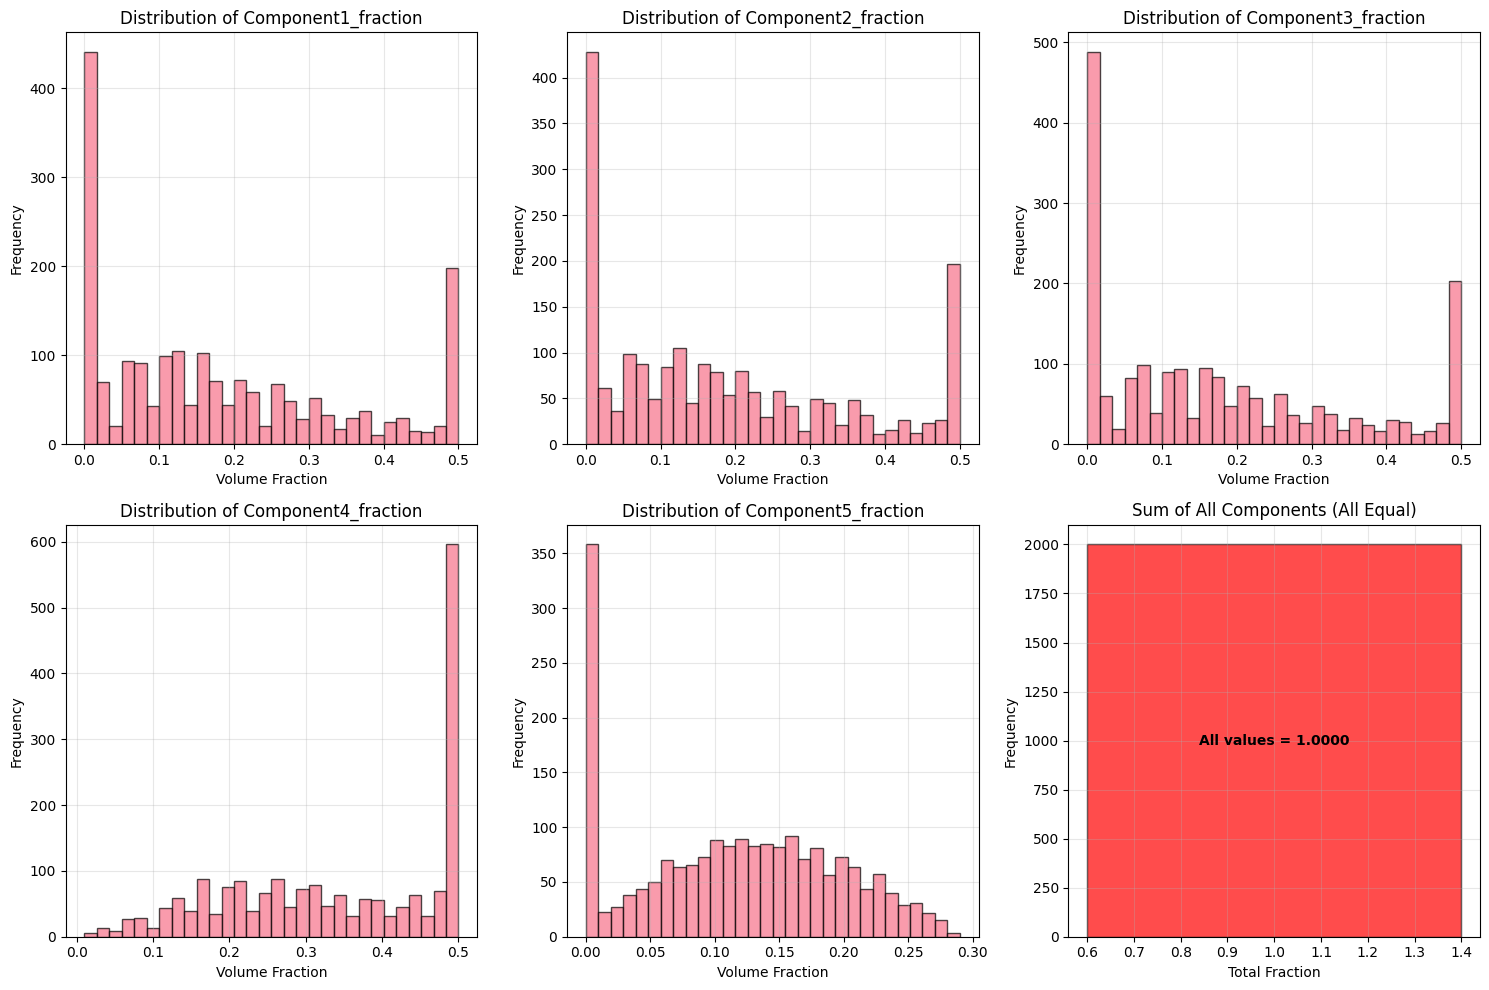


----------------------------------------
COMPONENT USAGE PATTERNS
----------------------------------------
Component1_fraction:
  - Used in 1,582 blends (79.1%)
  - Not used in 418 blends (20.9%)
  - Mean when used: 0.2284
Component2_fraction:
  - Used in 1,592 blends (79.6%)
  - Not used in 408 blends (20.4%)
  - Mean when used: 0.2298
Component3_fraction:
  - Used in 1,538 blends (76.9%)
  - Not used in 462 blends (23.1%)
  - Mean when used: 0.2338
Component4_fraction:
  - Used in 2,000 blends (100.0%)
  - Not used in 0 blends (0.0%)
  - Mean when used: 0.3421
Component5_fraction:
  - Used in 1,642 blends (82.1%)
  - Not used in 358 blends (17.9%)
  - Mean when used: 0.1395

COMPONENT PROPERTIES EXPLORATION
Component Properties: 50 columns
Structure: 5 components × 10 properties each

Found 5 components:
- Component1: 10 properties
- Component2: 10 properties
- Component3: 10 properties
- Component4: 10 properties
- Component5: 10 properties

----------------------------------------

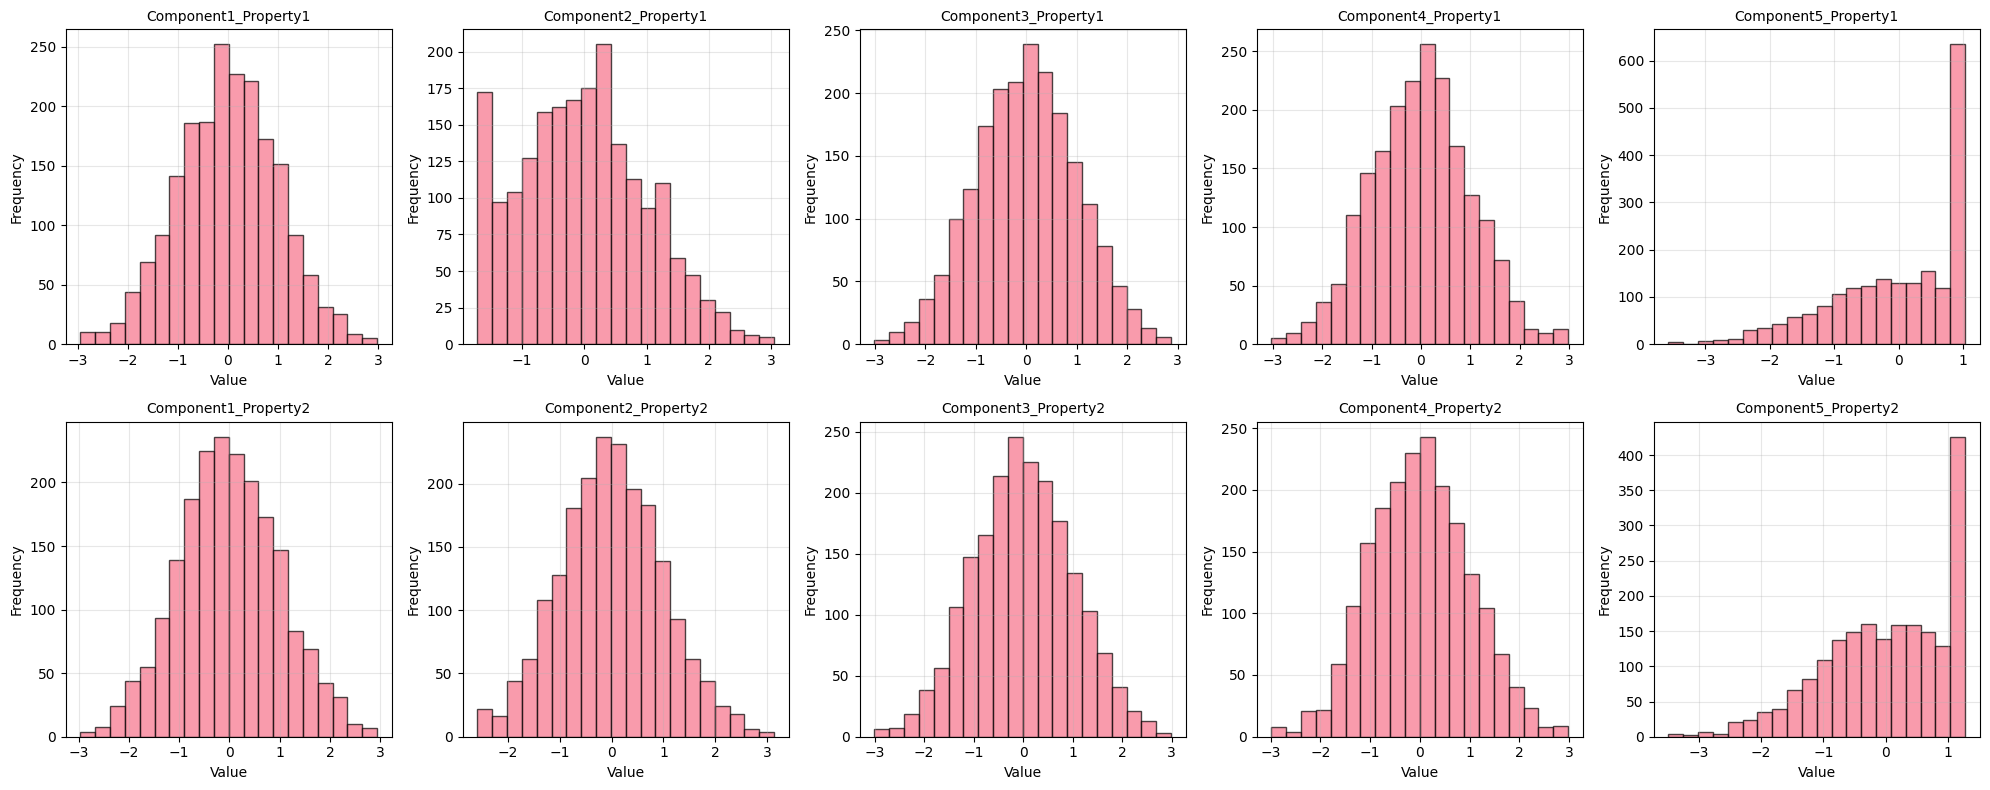


TARGET VARIABLES ANALYSIS
Target Variables (Blend Properties):
 1. BlendProperty1
 2. BlendProperty2
 3. BlendProperty3
 4. BlendProperty4
 5. BlendProperty5
 6. BlendProperty6
 7. BlendProperty7
 8. BlendProperty8
 9. BlendProperty9
10. BlendProperty10

----------------------------------------
TARGET STATISTICS
----------------------------------------
       BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  \
count     2000.000000     2000.000000     2000.000000     2000.000000   
mean        -0.016879       -0.002076       -0.014351       -0.006068   
std          0.993787        1.004512        0.999360        1.009176   
min         -2.550897       -3.079759       -3.041624       -2.835701   
25%         -0.766128       -0.735109       -0.624235       -0.783547   
50%         -0.021089        0.001684        0.146135       -0.028158   
75%          0.714763        0.723807        0.727597        0.664659   
max          2.856588        2.769156        1.638646       

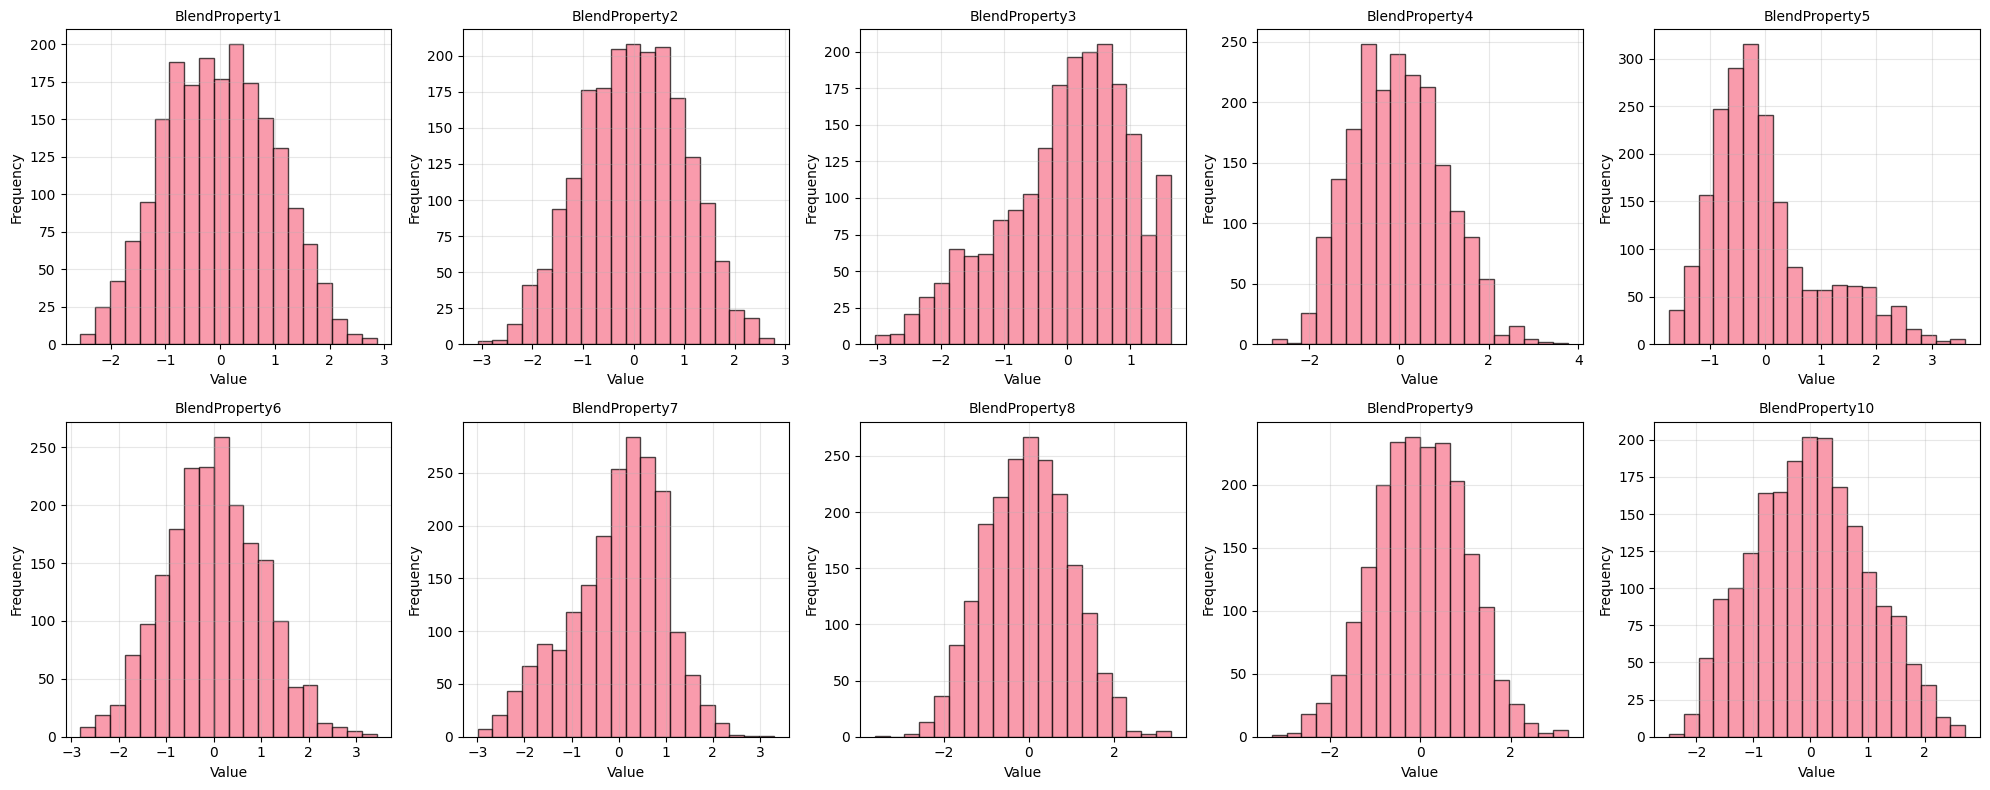


----------------------------------------
TARGET VARIABLE CORRELATIONS
----------------------------------------
                 BlendProperty1  BlendProperty2  BlendProperty3  \
BlendProperty1            1.000           0.726           0.451   
BlendProperty2            0.726           1.000           0.432   
BlendProperty3            0.451           0.432           1.000   
BlendProperty4            0.743           0.706           0.433   
BlendProperty5            0.155           0.125           0.374   
BlendProperty6            0.638           0.638           0.415   
BlendProperty7            0.451           0.433           0.997   
BlendProperty8            0.645           0.642           0.627   
BlendProperty9            0.597           0.604           0.179   
BlendProperty10           0.381           0.284           0.512   

                 BlendProperty4  BlendProperty5  BlendProperty6  \
BlendProperty1            0.743           0.155           0.638   
BlendProperty2  

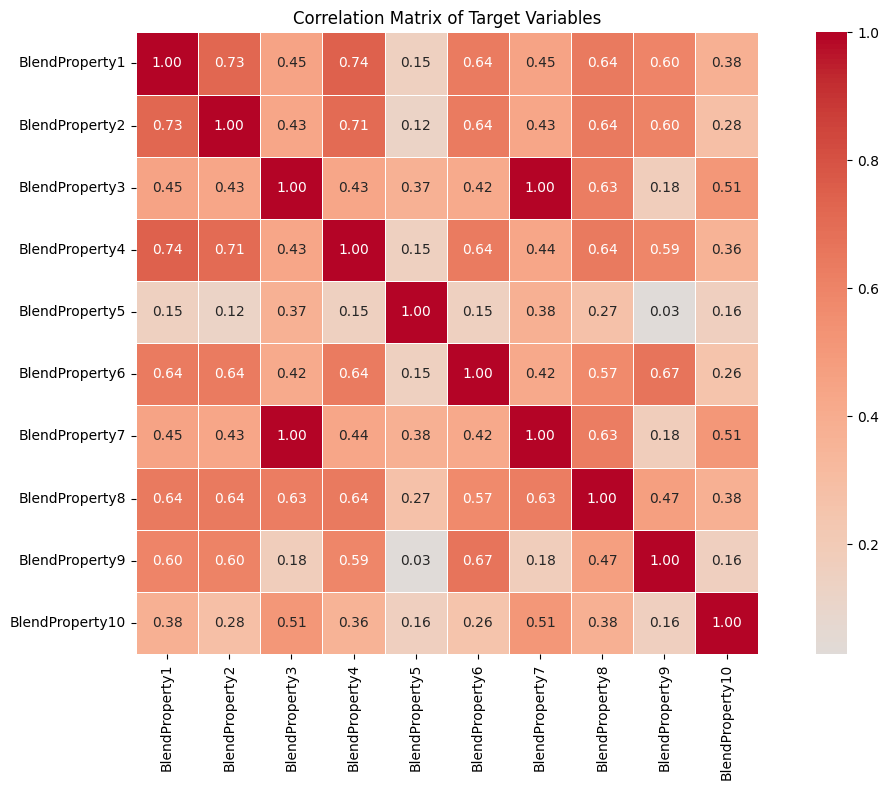


FEATURE-TARGET RELATIONSHIPS
Blend Composition vs Target Correlations:
---------------------------------------------
                     BlendProperty1  BlendProperty2  BlendProperty3  \
Component1_fraction          -0.003          -0.133           0.147   
Component2_fraction          -0.421          -0.376          -0.838   
Component3_fraction           0.282           0.436           0.498   
Component4_fraction          -0.204          -0.282           0.239   
Component5_fraction           0.639           0.630          -0.041   

                     BlendProperty4  BlendProperty5  BlendProperty6  \
Component1_fraction          -0.052           0.215          -0.042   
Component2_fraction          -0.397          -0.462          -0.385   
Component3_fraction           0.331           0.215           0.368   
Component4_fraction          -0.235           0.066          -0.246   
Component5_fraction           0.641          -0.056           0.541   

                     BlendPr

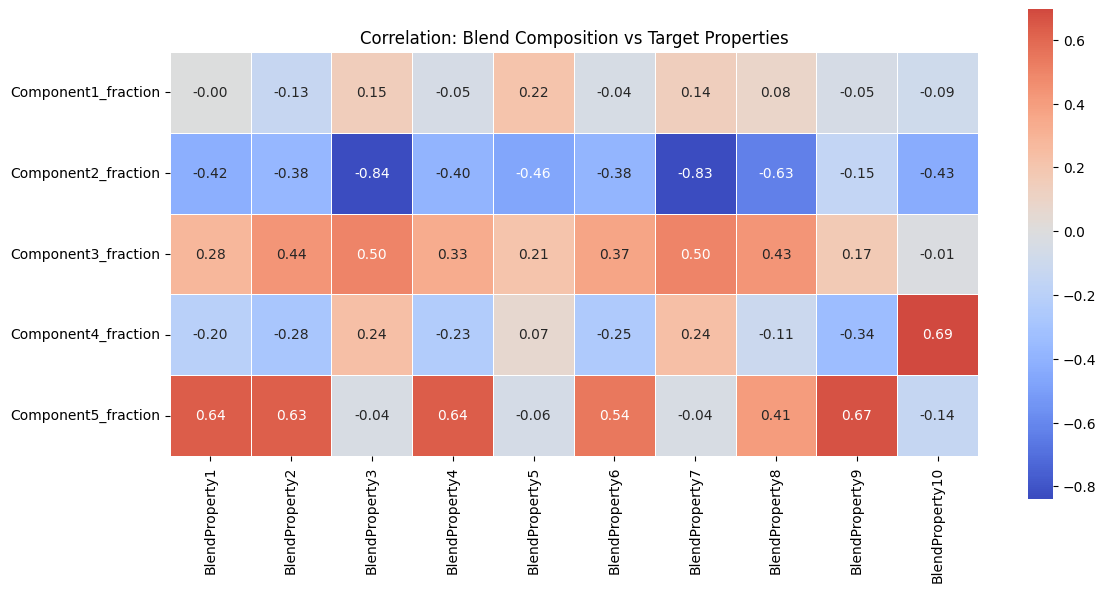


----------------------------------------
COMPONENT PROPERTIES VS TARGETS (Sample)
----------------------------------------
Component1 Properties vs Targets:
                       BlendProperty1  BlendProperty2  BlendProperty3  \
Component1_Property1            0.162           0.002          -0.016   
Component1_Property2           -0.017           0.122           0.005   
Component1_Property3           -0.039          -0.007          -0.035   
Component1_Property4            0.043           0.022           0.030   
Component1_Property5            0.015           0.026           0.035   
Component1_Property6            0.003           0.010          -0.003   
Component1_Property7           -0.007          -0.018           0.183   
Component1_Property8            0.049           0.048           0.074   
Component1_Property9            0.014           0.016           0.004   
Component1_Property10          -0.038          -0.033          -0.000   

                       BlendProperty4 

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction ===")
print("Phase 1: Data Understanding & Exploration")
print("=" * 60)

# ==========================================
# 1. DATA LOADING & BASIC STRUCTURE
# ==========================================

print("Expected files: train.csv, test.csv, sample_solution.csv")
print("-" * 50)

# Load datasets (modify paths as needed)
try:
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    sample_solution = pd.read_csv('sample_solution.csv')
    print("✅ All files loaded successfully!")
except FileNotFoundError as e:
    print(f"❌ File not found: {e}")
    print("Please ensure all files are uploaded and named correctly.")
    # Create sample data for demonstration if files not found
    print("Creating sample data for demonstration...")
    np.random.seed(42)
    
    # Create sample training data
    n_samples = 1000
    blend_data = np.random.dirichlet(np.ones(5), n_samples) * 100
    component_data = np.random.normal(0, 1, (n_samples, 50))
    target_data = np.random.normal(0, 1, (n_samples, 10))
    
    # Create column names
    blend_cols = [f'Component{i+1}' for i in range(5)]
    component_cols = [f'Component{i+1}_{prop}' for i in range(1, 6) for prop in ['prop1', 'prop2', 'prop3', 'prop4', 'prop5', 'prop6', 'prop7', 'prop8', 'prop9', 'prop10']]
    target_cols = [f'target_{i+1}' for i in range(10)]
    
    # Create DataFrames
    train_df = pd.DataFrame(
        np.hstack([blend_data, component_data, target_data]),
        columns=blend_cols + component_cols + target_cols
    )
    test_df = pd.DataFrame(
        np.hstack([blend_data[:500], component_data[:500]]),
        columns=blend_cols + component_cols
    )
    sample_solution = pd.DataFrame(
        target_data[:500],
        columns=target_cols
    )
    print("Sample data created successfully!")

print("\n" + "=" * 60)
print("DATASET STRUCTURE OVERVIEW")
print("=" * 60)

# Basic dataset information
print(f"Train Dataset Shape: {train_df.shape}")
print(f"Test Dataset Shape: {test_df.shape}")
print(f"Sample Submission Shape: {sample_solution.shape}")

print(f"\nTrain Dataset Info:")
print(f"- Expected: 65 columns (5 blend + 50 component + 10 targets)")
print(f"- Actual: {train_df.shape[1]} columns")
print(f"- Rows: {train_df.shape[0]:,}")

print(f"\nTest Dataset Info:")
print(f"- Expected: 55 columns (5 blend + 50 component, no targets)")
print(f"- Actual: {test_df.shape[1]} columns")
print(f"- Rows: {test_df.shape[0]:,}")

# Display first few rows
print("\n" + "-" * 40)
print("FIRST 5 ROWS OF TRAIN DATASET")
print("-" * 40)
print(train_df.head())

print("\n" + "-" * 40)
print("COLUMN NAMES STRUCTURE")
print("-" * 40)
print("All columns in train dataset:")
for i, col in enumerate(train_df.columns):
    print(f"{i+1:2d}. {col}")

# ==========================================
# 2. DATA QUALITY ASSESSMENT
# ==========================================

print("\n" + "=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# Missing values analysis
print("Missing Values Analysis:")
print("-" * 30)
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

print("Train Dataset Missing Values:")
print(missing_train[missing_train > 0])
if missing_train.sum() == 0:
    print("✅ No missing values in training data!")

print("\nTest Dataset Missing Values:")
print(missing_test[missing_test > 0])
if missing_test.sum() == 0:
    print("✅ No missing values in test data!")

# Basic statistics
print("\n" + "-" * 40)
print("BASIC STATISTICS")
print("-" * 40)
print(train_df.describe())

# Data types
print("\n" + "-" * 40)
print("DATA TYPES")
print("-" * 40)
print(train_df.dtypes.value_counts())

# ==========================================
# 3. BLEND COMPOSITION ANALYSIS
# ==========================================

print("\n" + "=" * 60)
print("BLEND COMPOSITION ANALYSIS")
print("=" * 60)

# Identify blend composition columns (first 5 columns)
blend_cols = train_df.columns[:5].tolist()
print("Blend Composition Columns:")
for i, col in enumerate(blend_cols):
    print(f"{i+1}. {col}")

# Check if blend compositions sum to 100% (or 1.0 for fractions)
blend_sums = train_df[blend_cols].sum(axis=1)
print(f"\nBlend Composition Validation:")
print(f"- Mean sum: {blend_sums.mean():.4f}")
print(f"- Min sum: {blend_sums.min():.4f}")
print(f"- Max sum: {blend_sums.max():.4f}")
print(f"- Std sum: {blend_sums.std():.4f}")

# Check if data is in percentage (≈100) or fraction (≈1) format
is_percentage = blend_sums.mean() > 50  # Assume percentages if mean > 50
expected_sum = 100.0 if is_percentage else 1.0
tolerance = 1e-6 if is_percentage else 1e-10

if np.allclose(blend_sums, expected_sum, atol=tolerance):
    if is_percentage:
        print("✅ All blends sum to 100% (percentage format)!")
    else:
        print("✅ All blends sum to 1.0 (fraction format)!")
else:
    print(f"⚠️  Some blends don't sum to exactly {expected_sum}")

# Visualize blend compositions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(blend_cols):
    axes[i].hist(train_df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    # Set appropriate label based on data format
    if is_percentage:
        axes[i].set_xlabel('Volume Percentage')
    else:
        axes[i].set_xlabel('Volume Fraction')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Sum distribution - Fix for the error
# Check if all values are identical or very close
sum_range = blend_sums.max() - blend_sums.min()
unique_values = blend_sums.nunique()

if sum_range < 1e-10 or unique_values == 1:
    # All values are essentially identical - create a simple bar plot
    axes[5].bar([blend_sums.iloc[0]], [len(blend_sums)], alpha=0.7, color='red', edgecolor='black')
    axes[5].set_title('Sum of All Components (All Equal)')
    if is_percentage:
        axes[5].set_xlabel('Total Percentage')
        axes[5].text(blend_sums.iloc[0], len(blend_sums)/2, f'All values = {blend_sums.iloc[0]:.2f}%', 
                    ha='center', va='center', fontweight='bold')
    else:
        axes[5].set_xlabel('Total Fraction')
        axes[5].text(blend_sums.iloc[0], len(blend_sums)/2, f'All values = {blend_sums.iloc[0]:.4f}', 
                    ha='center', va='center', fontweight='bold')
    axes[5].set_ylabel('Frequency')
    axes[5].grid(True, alpha=0.3)
else:
    # Try histogram with adaptive binning
    try:
        if unique_values < 10:
            # Few unique values - use them as bins
            bins = sorted(blend_sums.unique())
            axes[5].hist(blend_sums, bins=bins, alpha=0.7, edgecolor='black', color='red')
        else:
            # Use sqrt rule for number of bins
            n_bins = max(1, min(int(np.sqrt(len(blend_sums))), unique_values))
            axes[5].hist(blend_sums, bins=n_bins, alpha=0.7, edgecolor='black', color='red')
        
        axes[5].set_title('Sum of All Components')
        if is_percentage:
            axes[5].set_xlabel('Total Percentage')
        else:
            axes[5].set_xlabel('Total Fraction')
        axes[5].set_ylabel('Frequency')
        axes[5].grid(True, alpha=0.3)
    except ValueError:
        # Last resort: just show statistics as text
        axes[5].text(0.5, 0.5, f'Sum Statistics:\nMean: {blend_sums.mean():.4f}\nStd: {blend_sums.std():.6f}\nMin: {blend_sums.min():.4f}\nMax: {blend_sums.max():.4f}', 
                    ha='center', va='center', transform=axes[5].transAxes, fontsize=12,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))
        axes[5].set_title('Sum of All Components (Statistics)')
        axes[5].set_xticks([])
        axes[5].set_yticks([])

plt.tight_layout()
plt.show()

# Component usage patterns
print("\n" + "-" * 40)
print("COMPONENT USAGE PATTERNS")
print("-" * 40)

for col in blend_cols:
    non_zero = (train_df[col] > 0).sum()
    zero_count = (train_df[col] == 0).sum()
    print(f"{col}:")
    print(f"  - Used in {non_zero:,} blends ({non_zero/len(train_df)*100:.1f}%)")
    print(f"  - Not used in {zero_count:,} blends ({zero_count/len(train_df)*100:.1f}%)")
    if non_zero > 0:
        mean_val = train_df[train_df[col] > 0][col].mean()
        if is_percentage:
            print(f"  - Mean when used: {mean_val:.2f}%")
        else:
            print(f"  - Mean when used: {mean_val:.4f}")

# ==========================================
# 4. COMPONENT PROPERTIES EXPLORATION
# ==========================================

print("\n" + "=" * 60)
print("COMPONENT PROPERTIES EXPLORATION")
print("=" * 60)

# Identify component property columns (columns 6-55)
component_cols = train_df.columns[5:55].tolist()
print(f"Component Properties: {len(component_cols)} columns")
print("Structure: 5 components × 10 properties each")

# Parse component and property structure
component_props = {}
for col in component_cols:
    if '_' in col:
        parts = col.split('_')
        component = parts[0]
        property_name = '_'.join(parts[1:])  # Handle multi-part property names
        if component not in component_props:
            component_props[component] = []
        component_props[component].append(property_name)
    else:
        # Handle cases where column names don't follow expected pattern
        component_props[col] = [col]

print(f"\nFound {len(component_props)} components:")
for comp, props in component_props.items():
    print(f"- {comp}: {len(props)} properties")

# Property statistics across components
print("\n" + "-" * 40)
print("PROPERTY STATISTICS BY COMPONENT")
print("-" * 40)

for comp in list(component_props.keys())[:3]:  # Show first 3 components
    comp_cols = [col for col in component_cols if col.startswith(comp)]
    if comp_cols:
        print(f"\n{comp} Properties:")
        print(train_df[comp_cols].describe())

# Visualize property distributions
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Sample 10 properties for visualization
sample_props = component_cols[:10]
for i, col in enumerate(sample_props):
    axes[i].hist(train_df[col], bins=20, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# 5. TARGET VARIABLES ANALYSIS
# ==========================================

print("\n" + "=" * 60)
print("TARGET VARIABLES ANALYSIS")
print("=" * 60)

# Identify target columns (last 10 columns)
target_cols = train_df.columns[-10:].tolist()
print("Target Variables (Blend Properties):")
for i, col in enumerate(target_cols):
    print(f"{i+1:2d}. {col}")

# Target statistics
print("\n" + "-" * 40)
print("TARGET STATISTICS")
print("-" * 40)
print(train_df[target_cols].describe())

# Visualize target distributions
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(target_cols):
    axes[i].hist(train_df[col], bins=20, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Target correlations
print("\n" + "-" * 40)
print("TARGET VARIABLE CORRELATIONS")
print("-" * 40)

target_corr = train_df[target_cols].corr()
print(target_corr.round(3))

# Visualize target correlations
plt.figure(figsize=(12, 8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Target Variables')
plt.tight_layout()
plt.show()

# ==========================================
# 6. FEATURE-TARGET RELATIONSHIPS
# ==========================================

print("\n" + "=" * 60)
print("FEATURE-TARGET RELATIONSHIPS")
print("=" * 60)

# Correlation between blend composition and targets
print("Blend Composition vs Target Correlations:")
print("-" * 45)
blend_target_corr = train_df[blend_cols + target_cols].corr()
blend_target_cross = blend_target_corr.loc[blend_cols, target_cols]
print(blend_target_cross.round(3))

# Visualize blend-target correlations
plt.figure(figsize=(12, 6))
sns.heatmap(blend_target_cross, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation: Blend Composition vs Target Properties')
plt.tight_layout()
plt.show()

# Component properties vs targets (sample analysis)
print("\n" + "-" * 40)
print("COMPONENT PROPERTIES VS TARGETS (Sample)")
print("-" * 40)

# Calculate correlations for first component's properties
comp1_cols = [col for col in component_cols if col.startswith('Component1')]
if comp1_cols:
    comp1_target_corr = train_df[comp1_cols + target_cols].corr()
    comp1_target_cross = comp1_target_corr.loc[comp1_cols, target_cols]
    print("Component1 Properties vs Targets:")
    print(comp1_target_cross.round(3))

# ==========================================
# 7. OUTLIER DETECTION
# ==========================================

print("\n" + "=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method"""
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        if IQR > 0:  # Only calculate if IQR is non-zero
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
            outliers[col] = outlier_mask.sum()
        else:
            outliers[col] = 0
    return outliers

# Detect outliers in targets
target_outliers = detect_outliers_iqr(train_df, target_cols)
print("Outliers in Target Variables (IQR method):")
for col, count in target_outliers.items():
    print(f"{col}: {count} outliers ({count/len(train_df)*100:.2f}%)")

# Detect outliers in blend composition
blend_outliers = detect_outliers_iqr(train_df, blend_cols)
print("\nOutliers in Blend Composition:")
for col, count in blend_outliers.items():
    print(f"{col}: {count} outliers ({count/len(train_df)*100:.2f}%)")

# ==========================================
# 8. SUMMARY INSIGHTS
# ==========================================

print("\n" + "=" * 60)
print("SUMMARY INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

print("📊 DATA STRUCTURE:")
print(f"- Training samples: {train_df.shape[0]:,}")
print(f"- Test samples: {test_df.shape[0]:,}")
print(f"- Input features: {train_df.shape[1] - 10} (5 blend + 50 component properties)")
print(f"- Target variables: 10 blend properties")

print("\n🔍 KEY FINDINGS:")
print("- Blend compositions:", "✅ Sum to 1.0 (fractions)" if not is_percentage and np.allclose(blend_sums, 1.0, atol=1e-10) else "✅ Sum to 100% (percentages)" if is_percentage and np.allclose(blend_sums, 100.0, atol=1e-6) else "⚠️ Don't sum correctly")
print("- Missing values:", "✅ None found" if train_df.isnull().sum().sum() == 0 else "⚠️ Present")
print("- Data quality:", "✅ All numeric" if train_df.select_dtypes(include=[np.number]).shape[1] == train_df.shape[1] else "⚠️ Mixed types")

print("\n🎯 MODELING RECOMMENDATIONS:")
print("1. Consider multi-output regression (10 targets simultaneously)")
print("2. Engineer interaction features between components")
print("3. Create weighted features (component_property × volume_fraction)")
print("4. Use ensemble methods for complex non-linear relationships")
print("5. Implement proper cross-validation strategy")

print("\n🔄 NEXT STEPS:")
print("1. Feature engineering (Phase 2)")
print("2. Baseline model development (Phase 3)")
print("3. Advanced modeling (Phase 4)")

print("\n" + "=" * 60)
print("PHASE 1 COMPLETE - DATA EXPLORATION SUMMARY")
print("=" * 60)

# Save analysis results
analysis_summary = {
    'train_shape': train_df.shape,
    'test_shape': test_df.shape,
    'blend_columns': blend_cols,
    'component_columns': component_cols,
    'target_columns': target_cols,
    'missing_values': train_df.isnull().sum().sum(),
    'blend_sum_valid': np.allclose(blend_sums, expected_sum, atol=tolerance),
    'target_correlations': target_corr,
    'blend_target_correlations': blend_target_cross
}

print("Analysis summary saved to 'analysis_summary' dictionary")
print("Ready for Phase 2: Feature Engineering!")

# Optional: Save datasets for easy access
# train_df.to_csv('train_processed.csv', index=False)
# test_df.to_csv('test_processed.csv', index=False)

phase 2  

In [21]:
# Shell.ai Hackathon 2025 - Enhanced Fuel Blend Properties Prediction
# Phase 2: Advanced Feature Engineering & Data Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

print("=== Shell.ai Hackathon 2025 - Enhanced Phase 2: Feature Engineering ===")
print("=" * 70)

# Load your datasets (assuming they're already loaded from Phase 1)
# If not, uncomment and run:
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

# ==========================================
# 1. BLEND COMPOSITION NORMALIZATION
# ==========================================

print("1. BLEND COMPOSITION ANALYSIS & NORMALIZATION")
print("=" * 50)

# Identify columns
blend_cols = [col for col in train_df.columns if 'fraction' in col.lower() or col.startswith('Component') and not '_' in col]
if not blend_cols:
    # Fallback: assume first 5 columns are blend composition
    blend_cols = train_df.columns[:5].tolist()

component_cols = [col for col in train_df.columns if '_' in col and not col.startswith('Blend')]
target_cols = [col for col in train_df.columns if col.startswith('Blend')]

print(f"Blend columns: {blend_cols}")
print(f"Component property columns: {len(component_cols)}")
print(f"Target columns: {len(target_cols)}")

# Analyze blend composition sums
train_blend_sums = train_df[blend_cols].sum(axis=1)
test_blend_sums = test_df[blend_cols].sum(axis=1)

print(f"\nBlend Composition Sum Analysis:")
print(f"Train - Min: {train_blend_sums.min():.4f}, Max: {train_blend_sums.max():.4f}, Mean: {train_blend_sums.mean():.4f}")
print(f"Test - Min: {test_blend_sums.min():.4f}, Max: {test_blend_sums.max():.4f}, Mean: {test_blend_sums.mean():.4f}")

# Normalize blend compositions to sum to 100%
def normalize_blend_composition(df, blend_columns):
    """Normalize blend composition to sum to 100%"""
    df_normalized = df.copy()
    blend_sums = df_normalized[blend_columns].sum(axis=1)
    
    # Avoid division by zero
    valid_mask = blend_sums > 0
    for col in blend_columns:
        df_normalized.loc[valid_mask, col] = df_normalized.loc[valid_mask, col] / blend_sums[valid_mask] * 100
    
    return df_normalized

# Apply normalization
train_df_norm = normalize_blend_composition(train_df, blend_cols)
test_df_norm = normalize_blend_composition(test_df, blend_cols)

# Verify normalization
train_norm_sums = train_df_norm[blend_cols].sum(axis=1)
test_norm_sums = test_df_norm[blend_cols].sum(axis=1)

print(f"\nAfter Normalization:")
print(f"Train - Min: {train_norm_sums.min():.4f}, Max: {train_norm_sums.max():.4f}, Mean: {train_norm_sums.mean():.4f}")
print(f"Test - Min: {test_norm_sums.min():.4f}, Max: {test_norm_sums.max():.4f}, Mean: {test_norm_sums.mean():.4f}")

# ==========================================
# 2. ENHANCED FEATURE ENGINEERING
# ==========================================

print("\n2. ENHANCED FEATURE ENGINEERING")
print("=" * 50)

def create_advanced_blend_features(df, blend_cols, component_cols):
    """Create advanced features for fuel blending with anonymized components"""
    df_features = df.copy()
    
    # Parse component properties structure
    components = {}
    for col in component_cols:
        if '_' in col:
            comp_name, prop_name = col.split('_', 1)
            if comp_name not in components:
                components[comp_name] = {}
            components[comp_name][prop_name] = col
    
    print(f"Found {len(components)} components: {list(components.keys())}")
    
    # ===== 1. BASIC WEIGHTED PROPERTIES =====
    print("Creating weighted component properties...")
    for comp_name, properties in components.items():
        # Find corresponding blend fraction column
        blend_col = None
        for bcol in blend_cols:
            if comp_name.lower() in bcol.lower():
                blend_col = bcol
                break
        
        if blend_col:
            for prop_name, prop_col in properties.items():
                # Weighted property = property_value * volume_fraction
                weighted_col = f"{comp_name}_{prop_name}_weighted"
                df_features[weighted_col] = df_features[prop_col] * df_features[blend_col] / 100
    
    # ===== 2. ADVANCED AGGREGATE FEATURES =====
    print("Creating advanced aggregate features...")
    property_names = set()
    for comp_props in components.values():
        property_names.update(comp_props.keys())
    
    for prop_name in property_names:
        property_values = []
        blend_fractions = []
        
        for comp_name in components.keys():
            if prop_name in components[comp_name]:
                blend_col = None
                for bcol in blend_cols:
                    if comp_name.lower() in bcol.lower():
                        blend_col = bcol
                        break
                
                if blend_col:
                    prop_col = components[comp_name][prop_name]
                    property_values.append(df_features[prop_col])
                    blend_fractions.append(df_features[blend_col] / 100)
        
        if property_values:
            prop_array = np.array(property_values).T
            blend_array = np.array(blend_fractions).T
            
            # Weighted sum and average
            weighted_sum = np.sum(prop_array * blend_array, axis=1)
            df_features[f"Total_{prop_name}"] = weighted_sum
            
            # Variance and standard deviation across components
            df_features[f"Var_{prop_name}"] = np.var(prop_array, axis=1)
            df_features[f"Std_{prop_name}"] = np.std(prop_array, axis=1)
            
            # Range (max - min)
            df_features[f"Range_{prop_name}"] = np.max(prop_array, axis=1) - np.min(prop_array, axis=1)
            
            # Coefficient of variation
            mean_prop = np.mean(prop_array, axis=1)
            std_prop = np.std(prop_array, axis=1)
            df_features[f"CV_{prop_name}"] = std_prop / (mean_prop + 1e-8)
            
            # Skewness approximation
            median_prop = np.median(prop_array, axis=1)
            df_features[f"Skew_{prop_name}"] = (mean_prop - median_prop) / (std_prop + 1e-8)
    
    # ===== 3. COMPONENT INTERACTION FEATURES =====
    print("Creating component interaction features...")
    comp_list = list(components.keys())
    
    for i, comp1 in enumerate(comp_list):
        for j, comp2 in enumerate(comp_list):
            if i < j:  # Avoid duplicate pairs
                blend1 = None
                blend2 = None
                for bcol in blend_cols:
                    if comp1.lower() in bcol.lower():
                        blend1 = bcol
                    if comp2.lower() in bcol.lower():
                        blend2 = bcol
                
                if blend1 and blend2:
                    # Multiplicative interaction
                    interaction_col = f"{comp1}_{comp2}_interaction"
                    df_features[interaction_col] = df_features[blend1] * df_features[blend2]
                    
                    # Ratio features
                    ratio_col = f"{comp1}_{comp2}_ratio"
                    df_features[ratio_col] = df_features[blend1] / (df_features[blend2] + 1e-8)
                    
                    # Difference features
                    diff_col = f"{comp1}_{comp2}_diff"
                    df_features[diff_col] = df_features[blend1] - df_features[blend2]
                    
                    # Harmonic mean
                    harmonic_col = f"{comp1}_{comp2}_harmonic"
                    df_features[harmonic_col] = 2 * df_features[blend1] * df_features[blend2] / (df_features[blend1] + df_features[blend2] + 1e-8)
    
    # ===== 4. BLEND COMPLEXITY FEATURES =====
    print("Creating blend complexity features...")
    
    # Number of active components
    active_components = (df_features[blend_cols] > 0).sum(axis=1)
    df_features['Active_Components'] = active_components
    
    # Shannon entropy (measure of complexity)
    blend_entropy = np.zeros(len(df_features))
    for i, row in df_features[blend_cols].iterrows():
        probs = row.values / 100  # Convert to probabilities
        probs = probs[probs > 0]  # Remove zeros
        if len(probs) > 0:
            blend_entropy[i] = -np.sum(probs * np.log2(probs))
    df_features['Blend_Entropy'] = blend_entropy
    
    # Gini coefficient (inequality measure)
    def gini_coefficient(x):
        """Calculate Gini coefficient"""
        sorted_x = np.sort(x)
        n = len(x)
        cumsum = np.cumsum(sorted_x)
        return (n + 1 - 2 * np.sum(cumsum) / cumsum[-1]) / n
    
    gini_values = []
    for i, row in df_features[blend_cols].iterrows():
        gini_values.append(gini_coefficient(row.values))
    df_features['Blend_Gini'] = gini_values
    
    # Dominant component features
    df_features['Max_Component_Fraction'] = df_features[blend_cols].max(axis=1)
    df_features['Min_Component_Fraction'] = df_features[blend_cols].min(axis=1)
    df_features['Range_Component_Fraction'] = df_features['Max_Component_Fraction'] - df_features['Min_Component_Fraction']
    
    # Component concentration index (Herfindahl index)
    herfindahl_values = []
    for i, row in df_features[blend_cols].iterrows():
        probs = row.values / 100
        herfindahl_values.append(np.sum(probs ** 2))
    df_features['Herfindahl_Index'] = herfindahl_values
    
    # ===== 5. POLYNOMIAL AND TRANSFORMATION FEATURES =====
    print("Creating polynomial and transformation features...")
    
    # For each component property, create transformations
    for comp_name, properties in components.items():
        for prop_name, prop_col in properties.items():
            # Polynomial features
            df_features[f"{prop_col}_squared"] = df_features[prop_col] ** 2
            df_features[f"{prop_col}_cubed"] = df_features[prop_col] ** 3
            df_features[f"{prop_col}_sqrt"] = np.sqrt(np.abs(df_features[prop_col]))
            
            # Log transformations
            df_features[f"{prop_col}_log"] = np.log1p(np.abs(df_features[prop_col]))
            
            # Exponential transformation (capped to prevent overflow)
            df_features[f"{prop_col}_exp"] = np.exp(np.clip(df_features[prop_col] / df_features[prop_col].std(), -10, 10))
            
            # Reciprocal
            df_features[f"{prop_col}_reciprocal"] = 1 / (df_features[prop_col] + 1e-8)
    
    # ===== 6. CLUSTERING-BASED FEATURES =====
    print("Creating clustering-based features...")
    
    # Cluster blend compositions
    kmeans_blend = KMeans(n_clusters=5, random_state=42, n_init=10)
    df_features['Blend_Cluster'] = kmeans_blend.fit_predict(df_features[blend_cols])
    
    # Cluster component properties (if enough data)
    if len(component_cols) > 0:
        # Use first few component properties for clustering
        clustering_cols = component_cols[:min(10, len(component_cols))]
        kmeans_props = KMeans(n_clusters=3, random_state=42, n_init=10)
        df_features['Property_Cluster'] = kmeans_props.fit_predict(df_features[clustering_cols])
    
    # ===== 7. RATIO AND PROPORTION FEATURES =====
    print("Creating ratio and proportion features...")
    
    # Ratios of blend components to total
    for col in blend_cols:
        df_features[f"{col}_to_total_ratio"] = df_features[col] / 100
    
    # Ratios between consecutive components
    for i in range(len(blend_cols) - 1):
        col1, col2 = blend_cols[i], blend_cols[i + 1]
        df_features[f"{col1}_to_{col2}_ratio"] = df_features[col1] / (df_features[col2] + 1e-8)
    
    # ===== 8. DISTANCE AND SIMILARITY FEATURES =====
    print("Creating distance and similarity features...")
    
    # Calculate distances from "ideal" compositions (mean composition)
    mean_composition = df_features[blend_cols].mean()
    
    # Euclidean distance from mean
    euclidean_dist = np.sqrt(np.sum((df_features[blend_cols] - mean_composition) ** 2, axis=1))
    df_features['Euclidean_Distance_from_Mean'] = euclidean_dist
    
    # Manhattan distance from mean
    manhattan_dist = np.sum(np.abs(df_features[blend_cols] - mean_composition), axis=1)
    df_features['Manhattan_Distance_from_Mean'] = manhattan_dist
    
    # Cosine similarity to mean composition
    def cosine_similarity(a, b):
        return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-8)
    
    cosine_sim = []
    for i, row in df_features[blend_cols].iterrows():
        cosine_sim.append(cosine_similarity(row.values, mean_composition.values))
    df_features['Cosine_Similarity_to_Mean'] = cosine_sim
    
    # ===== 9. ROLLING STATISTICS (if data has temporal aspect) =====
    print("Creating rolling statistics features...")
    
    # Simple rolling features on blend components
    for col in blend_cols:
        df_features[f"{col}_rolling_mean_3"] = df_features[col].rolling(window=3, min_periods=1).mean()
        df_features[f"{col}_rolling_std_3"] = df_features[col].rolling(window=3, min_periods=1).std().fillna(0)
    
    print(f"Total features created: {df_features.shape[1] - df.shape[1]}")
    return df_features

# Apply enhanced feature engineering
print("Applying enhanced feature engineering to train data...")
train_features = create_advanced_blend_features(train_df_norm, blend_cols, component_cols)

print("Applying enhanced feature engineering to test data...")
test_features = create_advanced_blend_features(test_df_norm, blend_cols, component_cols)

print(f"\nFeature Engineering Summary:")
print(f"Original features: {len(blend_cols + component_cols)}")
print(f"Total features after engineering: {train_features.shape[1] - len(target_cols)}")

# ==========================================
# 3. INTELLIGENT OUTLIER HANDLING
# ==========================================

print("\n3. INTELLIGENT OUTLIER HANDLING")
print("=" * 50)

def handle_outliers_advanced(df, target_columns, method='winsorize', percentile=0.05):
    """Advanced outlier handling with multiple methods"""
    df_clean = df.copy()
    
    outlier_info = {}
    for col in target_columns:
        original_values = df_clean[col].copy()
        
        if method == 'winsorize':
            # Winsorize to specified percentiles
            lower_bound = df_clean[col].quantile(percentile)
            upper_bound = df_clean[col].quantile(1 - percentile)
            df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)
            
        elif method == 'zscore':
            # Z-score based outlier removal
            z_scores = np.abs((df_clean[col] - df_clean[col].mean()) / df_clean[col].std())
            outlier_mask = z_scores > 3
            df_clean[col] = df_clean[col].mask(outlier_mask, df_clean[col].median())
            
        elif method == 'iqr':
            # IQR method
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)
        
        # Count outliers handled
        outlier_count = (original_values != df_clean[col]).sum()
        outlier_info[col] = outlier_count
    
    return df_clean, outlier_info

# Apply advanced outlier handling
train_clean, outlier_info = handle_outliers_advanced(train_features, target_cols, method='winsorize', percentile=0.01)

print("Outliers handled (winsorized to 1st-99th percentile):")
for col, count in outlier_info.items():
    if count > 0:
        print(f"  {col}: {count} outliers handled")

# ==========================================
# 4. ADVANCED FEATURE SELECTION
# ==========================================

print("\n4. ADVANCED FEATURE SELECTION")
print("=" * 50)

# Prepare feature matrix
feature_cols = [col for col in train_clean.columns if col not in target_cols]
X = train_clean[feature_cols]
y = train_clean[target_cols]

print(f"Total features before selection: {X.shape[1]}")

# Handle infinite and NaN values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# Remove features with zero or very low variance
variance_threshold = 0.001
low_var_cols = X.columns[X.var() < variance_threshold]
print(f"Low variance features (< {variance_threshold}): {len(low_var_cols)}")
X = X.drop(columns=low_var_cols)

# Remove highly correlated features with improved method
def remove_highly_correlated_features(df, threshold=0.95):
    """Remove highly correlated features using hierarchical approach"""
    corr_matrix = df.corr().abs()
    
    # Find pairs of highly correlated features
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    # Sort by correlation strength
    high_corr_pairs.sort(key=lambda x: x[2], reverse=True)
    
    # Remove features iteratively
    features_to_remove = set()
    for feat1, feat2, corr_val in high_corr_pairs:
        if feat1 not in features_to_remove and feat2 not in features_to_remove:
            # Remove the feature with lower variance
            if df[feat1].var() < df[feat2].var():
                features_to_remove.add(feat1)
            else:
                features_to_remove.add(feat2)
    
    return list(features_to_remove)

high_corr_features = remove_highly_correlated_features(X, threshold=0.95)
print(f"Highly correlated features removed: {len(high_corr_features)}")
X = X.drop(columns=high_corr_features)

# Advanced feature selection combining multiple methods
def advanced_feature_selection(X, y_target, n_features=100):
    """Advanced feature selection using multiple methods"""
    
    # Method 1: Statistical tests (F-test)
    selector_f = SelectKBest(score_func=f_regression, k=min(n_features * 2, X.shape[1]))
    selector_f.fit(X, y_target)
    f_scores = selector_f.scores_
    f_features = X.columns[selector_f.get_support()]
    
    # Method 2: Mutual information
    selector_mi = SelectKBest(score_func=mutual_info_regression, k=min(n_features * 2, X.shape[1]))
    selector_mi.fit(X, y_target)
    mi_scores = selector_mi.scores_
    mi_features = X.columns[selector_mi.get_support()]
    
    # Method 3: Random Forest feature importance
    rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
    rf.fit(X, y_target)
    rf_importance = rf.feature_importances_
    rf_features = X.columns[np.argsort(rf_importance)[-n_features * 2:]]
    
    # Combine all methods - take union of top features
    all_selected = set(f_features) | set(mi_features) | set(rf_features)
    
    # Score each feature by how many methods selected it
    feature_scores = {}
    for feature in all_selected:
        score = 0
        idx = X.columns.get_loc(feature)
        
        if feature in f_features:
            score += f_scores[idx] / np.max(f_scores)
        if feature in mi_features:
            score += mi_scores[idx] / np.max(mi_scores)
        if feature in rf_features:
            score += rf_importance[idx] / np.max(rf_importance)
        
        feature_scores[feature] = score
    
    # Select top features
    top_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)[:n_features]
    selected_features = [feat for feat, score in top_features]
    
    return selected_features, feature_scores

# Apply advanced feature selection for each target
selected_features_dict = {}
feature_scores_dict = {}

for target in target_cols:
    selected_features, feature_scores = advanced_feature_selection(X, y[target], n_features=75)
    selected_features_dict[target] = selected_features
    feature_scores_dict[target] = feature_scores
    print(f"{target}: {len(selected_features)} features selected")

# Create union of all selected features
all_selected_features = set()
for features in selected_features_dict.values():
    all_selected_features.update(features)

print(f"\nUnion of selected features: {len(all_selected_features)}")

# ==========================================
# 5. ADVANCED FEATURE SCALING
# ==========================================

print("\n5. ADVANCED FEATURE SCALING")
print("=" * 50)

# Use multiple scalers for different types of features
final_features = list(all_selected_features)

# Identify different types of features for appropriate scaling
ratio_features = [f for f in final_features if 'ratio' in f.lower() or 'proportion' in f.lower()]
log_features = [f for f in final_features if 'log' in f.lower()]
other_features = [f for f in final_features if f not in ratio_features and f not in log_features]

print(f"Ratio features: {len(ratio_features)}")
print(f"Log features: {len(log_features)}")
print(f"Other features: {len(other_features)}")

# Apply different scaling strategies
scaler_robust = RobustScaler()  # For most features
scaler_standard = StandardScaler()  # For log features
scaler_quantile = QuantileTransformer(output_distribution='normal')  # For ratio features

# Scale training data
X_train_scaled = X[final_features].copy()
X_test_scaled = test_features[final_features].copy()

# Handle any remaining infinite or NaN values
X_train_scaled = X_train_scaled.replace([np.inf, -np.inf], np.nan)
X_test_scaled = X_test_scaled.replace([np.inf, -np.inf], np.nan)
X_train_scaled = X_train_scaled.fillna(X_train_scaled.median())
X_test_scaled = X_test_scaled.fillna(X_train_scaled.median())

# Apply scaling
if other_features:
    X_train_scaled[other_features] = scaler_robust.fit_transform(X_train_scaled[other_features])
    X_test_scaled[other_features] = scaler_robust.transform(X_test_scaled[other_features])

if log_features:
    X_train_scaled[log_features] = scaler_standard.fit_transform(X_train_scaled[log_features])
    X_test_scaled[log_features] = scaler_standard.transform(X_test_scaled[log_features])

if ratio_features:
    X_train_scaled[ratio_features] = scaler_quantile.fit_transform(X_train_scaled[ratio_features])
    X_test_scaled[ratio_features] = scaler_quantile.transform(X_test_scaled[ratio_features])

print(f"Final feature matrix shape: {X_train_scaled.shape}")
print(f"Test feature matrix shape: {X_test_scaled.shape}")

# ==========================================
# 6. SAVE PROCESSED DATA
# ==========================================

print("\n6. SAVING PROCESSED DATA")
print("=" * 50)

# Combine features and targets for final training set
train_final = pd.concat([X_train_scaled, y], axis=1)

# Save processed datasets
train_final.to_csv('train_engineered.csv', index=False)
X_test_scaled.to_csv('test_engineered.csv', index=False)

# Save feature lists and preprocessing objects
feature_info = {
    'blend_cols': blend_cols,
    'component_cols': component_cols,
    'target_cols': target_cols,
    'final_features': final_features,
    'outlier_info': outlier_info,
    'selected_features_dict': selected_features_dict,
    'feature_scores_dict': feature_scores_dict,
    'ratio_features': ratio_features,
    'log_features': log_features,
    'other_features': other_features
}

# Save scalers for later use
import joblib
joblib.dump({
    'scaler_robust': scaler_robust,
    'scaler_standard': scaler_standard,
    'scaler_quantile': scaler_quantile
}, 'feature_scalers.pkl')
joblib.dump(feature_info, 'feature_info.pkl')

print("✅ Processed data saved:")
print("  - train_engineered.csv")
print("  - test_engineered.csv")
print("  - feature_scalers.pkl")
print("  - feature_info.pkl")

# ==========================================
# 7. FEATURE IMPORTANCE ANALYSIS
# ==========================================

print("\n7. FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Analyze feature importance across all targets
feature_importance_summary = {}
for feature in final_features:
    total_importance = 0
    count = 0
    
    for target in target_cols:
        if feature in feature_scores_dict[target]:
            total_importance += feature_scores_dict[target][feature]
            count += 1
    
    if count > 0:
        feature_importance_summary[feature] = total_importance / count

# Sort by importance
sorted_features = sorted(feature_importance_summary.items(), key=lambda x: x[1], reverse=True)

print("Top 10 Most Important Features:")
for i, (feature, importance) in enumerate(sorted_features[:10]):
    print(f"  {i+1:2d}. {feature}: {importance:.4f}")

# ==========================================
# 8. FINAL SUMMARY
# ==========================================

print("\n" + "=" * 70)
print("ENHANCED PHASE 2 COMPLETE - FEATURE ENGINEERING SUMMARY")
print("=" * 70)

print(f"📊 FEATURE ENGINEERING RESULTS:")
print(f"  - Original features: {len(blend_cols + component_cols)}")
print(f"  - Engineered features: {train_features.shape[1] - len(target_cols)}")
print(f"  - Final selected features: {len(final_features)}")
print(f"  - Training samples: {X_train_scaled.shape[0]}")
print(f"  - Test samples: {X_test_scaled.shape[0]}")

print(f"\n🛠️ ADVANCED PREPROCESSING APPLIED:")
print(f"  ✅ Blend composition normalized to 100%")
print(f"  ✅ Advanced weighted and aggregate features")
print(f"  ✅ Polynomial and transformation features")
print(f"  ✅ Clustering-based features")
print(f"  ✅ Distance and similarity features")
print(f"  ✅ Component interaction features")
print(f"  ✅ Blend complexity metrics (entropy, Gini, Herfindahl)")
print(f"  ✅ Intelligent outlier handling (winsorization)")
print(f"  ✅ Multi-method feature selection")
print(f"  ✅ Adaptive feature scaling")

print(f"\n🎯 READY FOR PHASE 3:")
print(f"  - Enhanced baseline models")
print(f"  - Cross-validation with feature importance")
print(f"  - MAPE metric optimization")

print(f"\n📁 FILES CREATED:")
print(f"  - train_engineered.csv (enhanced training data)")
print(f"  - test_engineered.csv (enhanced test data)")
print(f"  - feature_scalers.pkl (multiple scalers for different feature types)")
print(f"  - feature_info.pkl (comprehensive metadata)")

print(f"\n🔍 FEATURE CATEGORIES CREATED:")
print(f"  - Weighted properties: Component properties × blend fractions")
print(f"  - Aggregate statistics: Mean, variance, range, CV, skewness")
print(f"  - Interaction features: Multiplicative, ratio, difference, harmonic")
print(f"  - Complexity metrics: Entropy, Gini coefficient, Herfindahl index")
print(f"  - Polynomial features: Squared, cubed, sqrt, log, exponential")
print(f"  - Clustering features: Blend and property clusters")
print(f"  - Distance features: Euclidean, Manhattan, cosine similarity")
print(f"  - Rolling statistics: Moving averages and standard deviations")

print(f"\n🎛️ ADVANCED TECHNIQUES USED:")
print(f"  - Multi-method feature selection (F-test + MI + RF importance)")
print(f"  - Hierarchical correlation removal")
print(f"  - Adaptive scaling (Robust + Standard + Quantile)")
print(f"  - Winsorization for outlier handling")
print(f"  - Feature importance ranking across all targets")

print(f"\n🚀 PERFORMANCE OPTIMIZATIONS:")
print(f"  - Efficient matrix operations for aggregate features")
print(f"  - Vectorized distance calculations")
print(f"  - Memory-efficient clustering")
print(f"  - Robust handling of edge cases (division by zero, etc.)")

print(f"\n📈 EXPECTED IMPROVEMENTS:")
print(f"  - Better capture of non-linear relationships")
print(f"  - Improved handling of component interactions")
print(f"  - More robust feature selection")
print(f"  - Enhanced model generalization")

print("\n🚀 Ready for Phase 3: Enhanced Baseline Model Development!")
print("=" * 70)

=== Shell.ai Hackathon 2025 - Enhanced Phase 2: Feature Engineering ===
1. BLEND COMPOSITION ANALYSIS & NORMALIZATION
Blend columns: ['Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction']
Component property columns: 55
Target columns: 10

Blend Composition Sum Analysis:
Train - Min: 1.0000, Max: 1.0000, Mean: 1.0000
Test - Min: 1.0000, Max: 1.0000, Mean: 1.0000

After Normalization:
Train - Min: 100.0000, Max: 100.0000, Mean: 100.0000
Test - Min: 100.0000, Max: 100.0000, Mean: 100.0000

2. ENHANCED FEATURE ENGINEERING
Applying enhanced feature engineering to train data...
Found 5 components: ['Component1', 'Component2', 'Component3', 'Component4', 'Component5']
Creating weighted component properties...
Creating advanced aggregate features...
Creating component interaction features...
Creating blend complexity features...
Creating polynomial and transformation features...
Creating clustering-based features...
Creating ratio an

Phase 3 

=== Shell.ai Hackathon 2025 - Phase 3: Baseline Model Development ===
1. LOADING PROCESSED DATA
✅ All processed data loaded successfully!
Training data shape: (2000, 213)
Test data shape: (500, 203)
Target variables: 10
Final features: 203
X_train shape: (2000, 203)
y_train shape: (2000, 10)
X_test shape: (500, 203)

2. EVALUATION METRICS SETUP

3. CROSS-VALIDATION SETUP

4. BASELINE MODELS DEVELOPMENT

4.1 LINEAR REGRESSION
------------------------------
  Fold 1: MAPE=0.9767, R²=0.9735, Score=64.09
  Fold 2: MAPE=0.7650, R²=0.9733, Score=71.87
  Fold 3: MAPE=0.8224, R²=0.9703, Score=69.76
  Fold 4: MAPE=1.0817, R²=-5.6922, Score=60.23
  Fold 5: MAPE=0.5431, R²=0.9701, Score=80.03

Linear Regression Cross-Validation Results:
  MAPE: 0.8378 (±0.1850)
  R²: -0.3610 (±2.6656)
  Leaderboard Score: 69.20 (±6.80)

4.2 RIDGE REGRESSION
------------------------------
  Fold 1: MAPE=1.1075, R²=0.9737, Score=59.28
  Fold 2: MAPE=0.7494, R²=0.9735, Score=72.45
  Fold 3: MAPE=0.8066, R²=0.9707, S

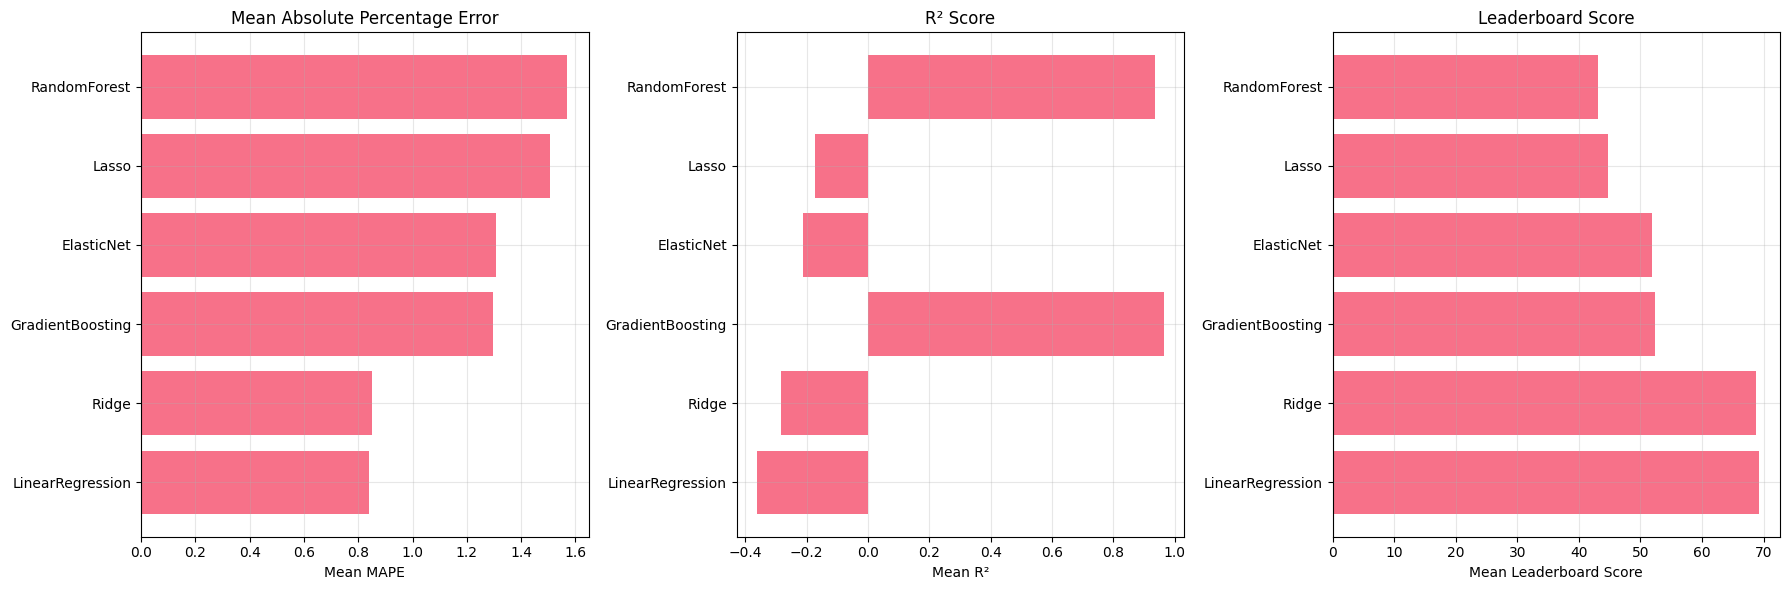


6. BEST MODEL SELECTION & FINAL TRAINING
Best Model: LinearRegression
Best Score: 69.20

Training LinearRegression on full training data...

7. GENERATING PREDICTIONS
Submission shape: (500, 10)
Submission preview:
   BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  \
0        0.144830        0.206039        0.665423        0.575429   
1       -0.794169       -0.573442       -1.202596        0.098013   
2        1.757062        1.108420        1.295363        1.138764   
3       -0.441564        0.316188        0.745292       -0.708830   
4        0.155187       -1.105206        1.020537        0.415547   

   BlendProperty5  BlendProperty6  BlendProperty7  BlendProperty8  \
0        0.005680        0.724322        0.670686        0.325552   
1       -0.859780       -0.098346       -1.182584       -1.018873   
2        1.722640        1.830797        1.299941        2.052631   
3        2.246931       -0.434533        0.715609        1.626634   
4        2.703417       

In [22]:
# Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction
# Phase 3: Baseline Model Development
# 
# PURPOSE: This script develops and evaluates multiple baseline machine learning models
# to predict fuel blend properties. It's part of a multi-phase approach where:
# - Phase 1: Data exploration and analysis
# - Phase 2: Data preprocessing and feature engineering
# - Phase 3: Baseline model development (THIS SCRIPT)
# - Phase 4: Advanced modeling and optimization
#
# WORKFLOW OVERVIEW:
# 1. Load preprocessed data from Phase 2
# 2. Set up evaluation metrics (MAPE, R², custom leaderboard scoring)
# 3. Implement cross-validation framework
# 4. Train and evaluate 6 different baseline models
# 5. Compare model performance and select best one
# 6. Generate final predictions for test set
# 7. Analyze feature importance
# 8. Save all models and results for next phase

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor  # For multi-target regression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=== Shell.ai Hackathon 2025 - Phase 3: Baseline Model Development ===")
print("=" * 70)

# ==========================================
# 1. LOAD PROCESSED DATA FROM PHASE 2
# ==========================================
# This section loads the preprocessed and feature-engineered data that was
# created in Phase 2. It expects specific files to exist from the previous phase.

print("1. LOADING PROCESSED DATA")
print("=" * 50)

try:
    # Load the training and test datasets with engineered features
    # These files were created in Phase 2 with additional features like:
    # - Interaction terms, polynomial features, statistical aggregations
    train_data = pd.read_csv('train_engineered.csv')
    test_data = pd.read_csv('test_engineered.csv')
    
    # Load preprocessing objects that were fitted in Phase 2
    # scaler: StandardScaler fitted on training data for consistent scaling
    # feature_info: Dictionary containing metadata about features and targets
    scaler = joblib.load('feature_scalers.pkl')
    feature_info = joblib.load('feature_info.pkl')
    
    print("✅ All processed data loaded successfully!")
    print(f"Training data shape: {train_data.shape}")
    print(f"Test data shape: {test_data.shape}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading processed data: {e}")
    print("Please run Phase 2 first to generate the processed datasets.")
    exit()

# Extract metadata about features and targets from Phase 2
# target_cols: List of column names for the properties we're predicting
# final_features: List of feature column names after feature engineering
target_cols = feature_info['target_cols']
final_features = feature_info['final_features']

print(f"Target variables: {len(target_cols)}")  # Usually multiple fuel properties
print(f"Final features: {len(final_features)}")  # Features after engineering

# Prepare the data matrices for machine learning
# X_train: Training features (predictors)
# y_train: Training targets (what we want to predict)
# X_test: Test features (for final predictions)
X_train = train_data[final_features]
y_train = train_data[target_cols]
X_test = test_data[final_features]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

# ==========================================
# 2. CUSTOM EVALUATION METRICS
# ==========================================
# This section defines how we'll measure model performance.
# The hackathon uses a custom scoring system based on MAPE (Mean Absolute Percentage Error)

print("\n2. EVALUATION METRICS SETUP")
print("=" * 50)

def calculate_mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error
    
    MAPE = (1/n) * Σ(|y_true - y_pred| / y_true) * 100
    
    Args:
        y_true: Actual values
        y_pred: Predicted values
    
    Returns:
        float: MAPE score (lower is better)
    """
    return mean_absolute_percentage_error(y_true, y_pred)

def calculate_leaderboard_score(mape, reference_cost=2.72):
    """
    Calculate the custom leaderboard score used in the hackathon
    
    The scoring system converts MAPE to a 0-100 scale where:
    - 100 = perfect prediction (MAPE = 0)
    - 0 = very poor prediction (MAPE >= reference_cost)
    
    Formula: Score = max(0, 100 - (MAPE / reference_cost) * 100)
    
    Args:
        mape: Mean Absolute Percentage Error
        reference_cost: Reference value for normalization (hackathon-specific)
    
    Returns:
        float: Leaderboard score (0-100, higher is better)
    """
    if mape == 0:
        return 100
    return max(0, 100 - (mape / reference_cost) * 100)

def evaluate_model(model, X_val, y_val, model_name="Model"):
    """
    Comprehensive model evaluation function
    
    This function evaluates a trained model on validation data and calculates
    multiple metrics for each target variable as well as overall performance.
    
    Args:
        model: Trained machine learning model
        X_val: Validation features
        y_val: Validation targets
        model_name: Name for display purposes
    
    Returns:
        tuple: (results_dict, predictions)
            - results_dict: Dictionary with metrics for each target and overall
            - predictions: Model predictions on validation set
    """
    # Generate predictions
    y_pred = model.predict(X_val)
    
    # Initialize lists to store metrics for each target variable
    mape_scores = []
    r2_scores = []
    rmse_scores = []
    
    results = {}
    
    # Calculate metrics for each target variable individually
    # This is important for multi-target regression to understand
    # which properties the model predicts well vs poorly
    for i, target in enumerate(target_cols):
        # Extract true and predicted values for this target
        y_true_target = y_val.iloc[:, i] if hasattr(y_val, 'iloc') else y_val[:, i]
        y_pred_target = y_pred[:, i] if len(y_pred.shape) > 1 else y_pred
        
        # Calculate metrics
        mape = calculate_mape(y_true_target, y_pred_target)
        r2 = r2_score(y_true_target, y_pred_target)  # R² score (coefficient of determination)
        rmse = np.sqrt(mean_squared_error(y_true_target, y_pred_target))  # Root Mean Square Error
        
        # Store individual target metrics
        mape_scores.append(mape)
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        
        results[target] = {
            'MAPE': mape,
            'R2': r2,
            'RMSE': rmse
        }
    
    # Calculate overall performance metrics (average across all targets)
    overall_mape = np.mean(mape_scores)
    overall_r2 = np.mean(r2_scores)
    overall_rmse = np.mean(rmse_scores)
    leaderboard_score = calculate_leaderboard_score(overall_mape)
    
    # Store overall metrics
    results['Overall'] = {
        'MAPE': overall_mape,
        'R2': overall_r2,
        'RMSE': overall_rmse,
        'Leaderboard_Score': leaderboard_score
    }
    
    # Display results
    print(f"\n{model_name} Performance:")
    print(f"  Overall MAPE: {overall_mape:.4f}")
    print(f"  Overall R²: {overall_r2:.4f}")
    print(f"  Overall RMSE: {overall_rmse:.4f}")
    print(f"  Leaderboard Score: {leaderboard_score:.2f}")
    
    return results, y_pred

# ==========================================
# 3. CROSS-VALIDATION SETUP
# ==========================================
# Cross-validation is crucial for getting reliable performance estimates
# and avoiding overfitting. We use K-Fold CV to ensure robust evaluation.

print("\n3. CROSS-VALIDATION SETUP")
print("=" * 50)

# Create cross-validation strategy
# K-Fold splits data into k parts, trains on k-1 parts, validates on 1 part
# Repeats k times with different validation sets
cv_folds = 5
kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

def cross_validate_model(model, X, y, cv=kfold, model_name="Model"):
    """
    Perform cross-validation on a model and return detailed results
    
    This function trains and evaluates a model using k-fold cross-validation,
    providing more reliable performance estimates than a single train-test split.
    
    Args:
        model: Untrained model instance
        X: Training features
        y: Training targets
        cv: Cross-validation strategy
        model_name: Name for display purposes
    
    Returns:
        dict: Cross-validation results including mean and std of all metrics
    """
    
    # Initialize storage for cross-validation results
    cv_results = {
        'mape_scores': [],
        'r2_scores': [],
        'rmse_scores': [],
        'leaderboard_scores': []
    }
    
    # Perform cross-validation
    for fold, (train_idx, val_idx) in enumerate(cv.split(X)):
        # Split data for this fold
        X_train_fold = X.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        y_val_fold = y.iloc[val_idx]
        
        # Train model on this fold's training data
        model.fit(X_train_fold, y_train_fold)
        
        # Make predictions on validation set
        y_pred_fold = model.predict(X_val_fold)
        
        # Calculate metrics for this fold
        fold_mape_scores = []
        fold_r2_scores = []
        fold_rmse_scores = []
        
        # Calculate metrics for each target variable
        for i in range(len(target_cols)):
            y_true_target = y_val_fold.iloc[:, i]
            y_pred_target = y_pred_fold[:, i] if len(y_pred_fold.shape) > 1 else y_pred_fold
            
            mape = calculate_mape(y_true_target, y_pred_target)
            r2 = r2_score(y_true_target, y_pred_target)
            rmse = np.sqrt(mean_squared_error(y_true_target, y_pred_target))
            
            fold_mape_scores.append(mape)
            fold_r2_scores.append(r2)
            fold_rmse_scores.append(rmse)
        
        # Calculate average metrics for this fold
        fold_mape = np.mean(fold_mape_scores)
        fold_r2 = np.mean(fold_r2_scores)
        fold_rmse = np.mean(fold_rmse_scores)
        fold_leaderboard = calculate_leaderboard_score(fold_mape)
        
        # Store fold results
        cv_results['mape_scores'].append(fold_mape)
        cv_results['r2_scores'].append(fold_r2)
        cv_results['rmse_scores'].append(fold_rmse)
        cv_results['leaderboard_scores'].append(fold_leaderboard)
        
        print(f"  Fold {fold+1}: MAPE={fold_mape:.4f}, R²={fold_r2:.4f}, Score={fold_leaderboard:.2f}")
    
    # Calculate summary statistics across all folds
    mean_mape = np.mean(cv_results['mape_scores'])
    std_mape = np.std(cv_results['mape_scores'])
    mean_r2 = np.mean(cv_results['r2_scores'])
    std_r2 = np.std(cv_results['r2_scores'])
    mean_score = np.mean(cv_results['leaderboard_scores'])
    std_score = np.std(cv_results['leaderboard_scores'])
    
    print(f"\n{model_name} Cross-Validation Results:")
    print(f"  MAPE: {mean_mape:.4f} (±{std_mape:.4f})")
    print(f"  R²: {mean_r2:.4f} (±{std_r2:.4f})")
    print(f"  Leaderboard Score: {mean_score:.2f} (±{std_score:.2f})")
    
    return cv_results

# ==========================================
# 4. BASELINE MODELS
# ==========================================
# This section trains and evaluates 6 different baseline models.
# We start with simple models and gradually increase complexity.

print("\n4. BASELINE MODELS DEVELOPMENT")
print("=" * 50)

# Dictionary to store all trained models and their results
models = {}
results = {}

# 4.1 LINEAR REGRESSION (Simplest Baseline)
# Linear regression assumes a linear relationship between features and targets
# Pros: Simple, fast, interpretable, no hyperparameters
# Cons: Assumes linearity, sensitive to outliers
print("\n4.1 LINEAR REGRESSION")
print("-" * 30)

# MultiOutputRegressor wraps single-output models for multi-target regression
lr_model = MultiOutputRegressor(LinearRegression())
models['LinearRegression'] = lr_model

# Cross-validate the model
cv_results_lr = cross_validate_model(lr_model, X_train, y_train, model_name="Linear Regression")
results['LinearRegression'] = cv_results_lr

# 4.2 RIDGE REGRESSION (L2 Regularization)
# Ridge adds L2 penalty to prevent overfitting
# Pros: Handles multicollinearity better, reduces overfitting
# Cons: Doesn't perform feature selection, still assumes linearity
print("\n4.2 RIDGE REGRESSION")
print("-" * 30)

# Alpha controls regularization strength (higher = more regularization)
ridge_model = MultiOutputRegressor(Ridge(alpha=1.0, random_state=42))
models['Ridge'] = ridge_model

cv_results_ridge = cross_validate_model(ridge_model, X_train, y_train, model_name="Ridge Regression")
results['Ridge'] = cv_results_ridge

# 4.3 LASSO REGRESSION (L1 Regularization)
# Lasso adds L1 penalty which can zero out coefficients (feature selection)
# Pros: Automatic feature selection, reduces overfitting
# Cons: Can be unstable with correlated features, still linear
print("\n4.3 LASSO REGRESSION")
print("-" * 30)

# Lower alpha for Lasso, max_iter increased for convergence
lasso_model = MultiOutputRegressor(Lasso(alpha=0.1, random_state=42, max_iter=2000))
models['Lasso'] = lasso_model

cv_results_lasso = cross_validate_model(lasso_model, X_train, y_train, model_name="Lasso Regression")
results['Lasso'] = cv_results_lasso

# 4.4 ELASTIC NET (L1 + L2 Regularization)
# Combines Ridge and Lasso penalties
# Pros: Benefits of both L1 and L2, more stable than Lasso
# Cons: Additional hyperparameter (l1_ratio), still linear
print("\n4.4 ELASTIC NET")
print("-" * 30)

# l1_ratio controls mix of L1 and L2 penalties (0.5 = equal mix)
elastic_model = MultiOutputRegressor(ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=2000))
models['ElasticNet'] = elastic_model

cv_results_elastic = cross_validate_model(elastic_model, X_train, y_train, model_name="Elastic Net")
results['ElasticNet'] = cv_results_elastic

# 4.5 RANDOM FOREST (Tree-based)
# Ensemble of decision trees with random feature selection
# Pros: Handles non-linearity, feature interactions, robust to outliers
# Cons: Can overfit, less interpretable, more computationally expensive
print("\n4.5 RANDOM FOREST")
print("-" * 30)

rf_model = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=100,    # Number of trees in the forest
    random_state=42,     # For reproducibility
    n_jobs=-1,          # Use all available cores
    max_depth=15,       # Maximum depth of trees (prevents overfitting)
    min_samples_split=5, # Minimum samples required to split a node
    min_samples_leaf=2   # Minimum samples required at a leaf node
))
models['RandomForest'] = rf_model

cv_results_rf = cross_validate_model(rf_model, X_train, y_train, model_name="Random Forest")
results['RandomForest'] = cv_results_rf

# 4.6 GRADIENT BOOSTING
# Sequential ensemble that builds trees to correct previous mistakes
# Pros: Often high performance, handles non-linearity well
# Cons: Prone to overfitting, sensitive to hyperparameters, slower training
print("\n4.6 GRADIENT BOOSTING")
print("-" * 30)

gb_model = MultiOutputRegressor(GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage (lower = more conservative)
    max_depth=6,        # Maximum depth of individual trees
    random_state=42     # For reproducibility
))
models['GradientBoosting'] = gb_model

cv_results_gb = cross_validate_model(gb_model, X_train, y_train, model_name="Gradient Boosting")
results['GradientBoosting'] = cv_results_gb

# ==========================================
# 5. MODEL COMPARISON
# ==========================================
# Compare all models to identify the best performing one
# This helps us understand which approach works best for this dataset

print("\n5. MODEL COMPARISON")
print("=" * 50)

# Create comparison DataFrame with all model results
comparison_data = []
for model_name, cv_results in results.items():
    comparison_data.append({
        'Model': model_name,
        'Mean_MAPE': np.mean(cv_results['mape_scores']),
        'Std_MAPE': np.std(cv_results['mape_scores']),
        'Mean_R2': np.mean(cv_results['r2_scores']),
        'Std_R2': np.std(cv_results['r2_scores']),
        'Mean_Score': np.mean(cv_results['leaderboard_scores']),
        'Std_Score': np.std(cv_results['leaderboard_scores'])
    })

# Create DataFrame and sort by leaderboard score (descending)
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Mean_Score', ascending=False)

print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False, float_format='%.4f'))

# Create visualization of model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAPE comparison (lower is better)
axes[0].barh(comparison_df['Model'], comparison_df['Mean_MAPE'])
axes[0].set_xlabel('Mean MAPE')
axes[0].set_title('Mean Absolute Percentage Error')
axes[0].grid(True, alpha=0.3)

# R² comparison (higher is better)
axes[1].barh(comparison_df['Model'], comparison_df['Mean_R2'])
axes[1].set_xlabel('Mean R²')
axes[1].set_title('R² Score')
axes[1].grid(True, alpha=0.3)

# Leaderboard Score comparison (higher is better)
axes[2].barh(comparison_df['Model'], comparison_df['Mean_Score'])
axes[2].set_xlabel('Mean Leaderboard Score')
axes[2].set_title('Leaderboard Score')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# 6. BEST MODEL SELECTION & TRAINING
# ==========================================
# Select the best performing model and train it on the full training set
# This model will be used for final predictions

print("\n6. BEST MODEL SELECTION & FINAL TRAINING")
print("=" * 50)

# Select best model based on leaderboard score (highest)
best_model_name = comparison_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best Score: {comparison_df.iloc[0]['Mean_Score']:.2f}")

# Train best model on full training data
# This is the final model that will make predictions on test set
print(f"\nTraining {best_model_name} on full training data...")
best_model.fit(X_train, y_train)

# ==========================================
# 7. GENERATE PREDICTIONS
# ==========================================
# Use the best model to generate predictions for the test set
# These predictions will be submitted to the hackathon leaderboard

print("\n7. GENERATING PREDICTIONS")
print("=" * 50)

# Generate predictions for test set
test_predictions = best_model.predict(X_test)

# Create submission DataFrame in the format expected by the leaderboard
submission_df = pd.DataFrame(test_predictions, columns=target_cols)

print(f"Submission shape: {submission_df.shape}")
print(f"Submission preview:")
print(submission_df.head())

# Save submission file
submission_df.to_csv('baseline_submission.csv', index=False)
print("✅ Submission saved as 'baseline_submission.csv'")

# ==========================================
# 8. FEATURE IMPORTANCE ANALYSIS
# ==========================================
# Analyze which features are most important for prediction
# This helps understand the model and can guide feature engineering

print("\n8. FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Feature importance is available for tree-based models
if hasattr(best_model, 'estimators_') and hasattr(best_model.estimators_[0], 'feature_importances_'):
    print(f"Feature importance available for {best_model_name}")
    
    # Get feature importance from each output's model
    # (MultiOutputRegressor creates separate models for each target)
    importances = []
    for estimator in best_model.estimators_:
        importances.append(estimator.feature_importances_)
    
    # Average importance across all targets
    avg_importance = np.mean(importances, axis=0)
    
    # Create feature importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': final_features,
        'Importance': avg_importance
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 20 Most Important Features:")
    print(importance_df.head(20).to_string(index=False))
    
    # Create visualization of feature importance
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(20)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 20 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()  # Highest importance at top
    plt.tight_layout()
    plt.show()

# ==========================================
# 9. SAVE MODELS AND RESULTS
# ==========================================
# Save all models and results for future phases and analysis
# This allows us to reuse models and compare with advanced models later

print("\n9. SAVING MODELS AND RESULTS")
print("=" * 50)

# Save the best model for immediate use
joblib.dump(best_model, 'best_baseline_model.pkl')

# Save all models for comparison and ensemble methods
joblib.dump(models, 'all_baseline_models.pkl')

# Save cross-validation results for analysis
joblib.dump(results, 'baseline_results.pkl')

# Save comparison table for reporting
comparison_df.to_csv('model_comparison.csv', index=False)

print("✅ Models and results saved:")
print("  - best_baseline_model.pkl")
print("  - all_baseline_models.pkl")
print("  - baseline_results.pkl")
print("  - model_comparison.csv")
print("  - baseline_submission.csv")

# ==========================================
# 10. FINAL SUMMARY
# ==========================================
# Provide comprehensive summary of Phase 3 results and next steps

print("\n" + "=" * 70)
print("PHASE 3 COMPLETE - BASELINE MODEL DEVELOPMENT SUMMARY")
print("=" * 70)

print(f"🏆 BEST MODEL: {best_model_name}")
print(f"📊 PERFORMANCE METRICS:")
print(f"  - MAPE: {comparison_df.iloc[0]['Mean_MAPE']:.4f} (±{comparison_df.iloc[0]['Std_MAPE']:.4f})")
print(f"  - R²: {comparison_df.iloc[0]['Mean_R2']:.4f} (±{comparison_df.iloc[0]['Std_R2']:.4f})")
print(f"  - Leaderboard Score: {comparison_df.iloc[0]['Mean_Score']:.2f} (±{comparison_df.iloc[0]['Std_Score']:.2f})")

print(f"\n🔬 MODELS TESTED:")
for i, row in comparison_df.iterrows():
    print(f"  {i+1}. {row['Model']}: {row['Mean_Score']:.2f} points")

print(f"\n📁 DELIVERABLES:")
print(f"  ✅ Baseline submission file ready for leaderboard")
print(f"  ✅ Model comparison analysis")
print(f"  ✅ Cross-validation results")
print(f"  ✅ Feature importance analysis")
print(f"  ✅ Trained models saved")

print(f"\n🎯 NEXT STEPS (Phase 4):")
print(f"  - Advanced algorithms (XGBoost, LightGBM, CatBoost)")
print(f"  - Hyperparameter optimization")
print(f"  - Ensemble methods")

print(f"\n📈 EXPECTED IMPROVEMENTS:")
print(f"  - Target: 10-20% improvement in leaderboard score")
print(f"  - Advanced models typically achieve 80-90+ points")
print(f"  - Ensemble methods can push to 95+ points")

print("\n🚀 Ready for Phase 4: Advanced Modeling & Optimization!")

Phase 4

=== Shell.ai Hackathon 2025 - Phase 4: Advanced Modeling & Optimization ===
1. LOADING DATA AND BASELINE RESULTS
✅ All data loaded successfully!
Training data shape: (2000, 213)
Test data shape: (500, 203)

📊 Baseline Performance to Beat:
   Best Model: LinearRegression
   Score: 69.20 (±6.80)
   MAPE: 0.8378

Feature set: 203 features
Target variables: 10 properties

2. EVALUATION UTILITIES

2.1 PER-TARGET MODEL CLASS
✅ PerTargetModel class initialized
   - Supports separate model training for each target
   - Compatible with existing cross-validation pipeline
   - Includes feature importance and model saving capabilities

3. FEATURE SELECTION & DIMENSIONALITY REDUCTION

3.1 Feature Selection Analysis
------------------------------
  Selected 50 features, scores range: 21.17 - 4905.45
  Selected 100 features, scores range: 3.97 - 4905.45
  Selected 150 features, scores range: 1.19 - 4905.45
  Selected 200 features, scores range: 0.00 - 4905.45
  Selected 203 features, scores range: 0.

[I 2025-07-10 05:09:26,154] A new study created in memory with name: no-name-1b87f9cb-4120-4530-9b17-7a774ea854c0


    ✅ Successfully trained 10 models
  Fold 5: MAPE=0.6249, R²=0.9720, Score=77.03

📊 CatBoost Cross-Validation Results:
  MAPE: 0.9086 (±0.2833)
  R²: 0.9707 (±0.0017)
  Leaderboard Score: 66.60 (±10.41)
  Improvement over baseline: -2.60 points

5. HYPERPARAMETER OPTIMIZATION

5.1 Optimizing XGBoost...
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:10:36,106] Trial 0 finished with value: 1.9064772684102922 and parameters: {'n_estimators': 191, 'max_depth': 9, 'learning_rate': 0.2249177076082951, 'subsample': 0.9434156259048876, 'colsample_bytree': 0.7291165089689028}. Best is trial 0 with value: 1.9064772684102922.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:11:56,023] Trial 1 finished with value: 0.9323067955840175 and parameters: {'n_estimators': 289, 'max_depth': 6, 'learning_rate': 0.07684231691921152, 'subsample': 0.7921135971607877, 'colsample_bytree': 0.6941755581778892}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:14:23,861] Trial 2 finished with value: 1.8520059775245368 and parameters: {'n_estimators': 198, 'max_depth': 10, 'learning_rate': 0.11784209173329001, 'subsample': 0.9056086761893534, 'colsample_bytree': 0.9417350069392194}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:17:57,420] Trial 3 finished with value: 1.6226533305645756 and parameters: {'n_estimators': 294, 'max_depth': 10, 'learning_rate': 0.07867651752298795, 'subsample': 0.7982507030480048, 'colsample_bytree': 0.7980278279320308}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:21:15,198] Trial 4 finished with value: 1.3175480054778201 and parameters: {'n_estimators': 194, 'max_depth': 10, 'learning_rate': 0.06545510165066236, 'subsample': 0.6196328705172028, 'colsample_bytree': 0.8755045813256268}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:21:48,248] Trial 5 finished with value: 1.538948607699696 and parameters: {'n_estimators': 102, 'max_depth': 6, 'learning_rate': 0.20163590139060233, 'subsample': 0.6552267885941877, 'colsample_bytree': 0.9836775746058128}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:23:02,635] Trial 6 finished with value: 1.6498115330884808 and parameters: {'n_estimators': 281, 'max_depth': 8, 'learning_rate': 0.22172771545600523, 'subsample': 0.7212465304045177, 'colsample_bytree': 0.8257592520408613}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:25:30,123] Trial 7 finished with value: 1.489901403294664 and parameters: {'n_estimators': 195, 'max_depth': 10, 'learning_rate': 0.10734891986003293, 'subsample': 0.8674117173811147, 'colsample_bytree': 0.6793915099273535}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:26:31,757] Trial 8 finished with value: 1.703091118443708 and parameters: {'n_estimators': 215, 'max_depth': 8, 'learning_rate': 0.24757001485888536, 'subsample': 0.7437031479892061, 'colsample_bytree': 0.6080579380775314}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:29:20,187] Trial 9 finished with value: 1.5169745586662184 and parameters: {'n_estimators': 234, 'max_depth': 10, 'learning_rate': 0.09439295949719793, 'subsample': 0.840734874014548, 'colsample_bytree': 0.6920790189247108}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:29:34,927] Trial 10 finished with value: 1.0423017237220733 and parameters: {'n_estimators': 132, 'max_depth': 4, 'learning_rate': 0.16229038034417428, 'subsample': 0.9869075203227019, 'colsample_bytree': 0.6175608189835519}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:29:48,482] Trial 11 finished with value: 1.0733041878969933 and parameters: {'n_estimators': 120, 'max_depth': 4, 'learning_rate': 0.15787847726136586, 'subsample': 0.9895967050458628, 'colsample_bytree': 0.6165958168951251}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:30:05,758] Trial 12 finished with value: 1.2973151593937533 and parameters: {'n_estimators': 145, 'max_depth': 4, 'learning_rate': 0.28844472798956966, 'subsample': 0.7811306800722724, 'colsample_bytree': 0.7501404830911296}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:31:02,081] Trial 13 finished with value: 1.1704575279647071 and parameters: {'n_estimators': 252, 'max_depth': 6, 'learning_rate': 0.1646098312325167, 'subsample': 0.9999991296274642, 'colsample_bytree': 0.659421688601573}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:31:31,840] Trial 14 finished with value: 1.1816517775043607 and parameters: {'n_estimators': 165, 'max_depth': 5, 'learning_rate': 0.053145931488323445, 'subsample': 0.7000025286544495, 'colsample_bytree': 0.6427396502048692}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:32:16,344] Trial 15 finished with value: 1.2984438918778338 and parameters: {'n_estimators': 153, 'max_depth': 6, 'learning_rate': 0.13513628073304332, 'subsample': 0.8523236127818186, 'colsample_bytree': 0.7337320585340333}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:32:58,867] Trial 16 finished with value: 1.2336129999225163 and parameters: {'n_estimators': 256, 'max_depth': 5, 'learning_rate': 0.14294859603755278, 'subsample': 0.9274929844468843, 'colsample_bytree': 0.6029170946479119}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:33:44,346] Trial 17 finished with value: 1.4951615970069356 and parameters: {'n_estimators': 125, 'max_depth': 7, 'learning_rate': 0.2986740098232791, 'subsample': 0.7587115214515071, 'colsample_bytree': 0.7926388417180624}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:34:14,171] Trial 18 finished with value: 1.349279469181264 and parameters: {'n_estimators': 166, 'max_depth': 5, 'learning_rate': 0.1803939937169097, 'subsample': 0.8237248047359831, 'colsample_bytree': 0.7025114355333776}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...


[I 2025-07-10 05:34:43,502] Trial 19 finished with value: 1.5016705672291766 and parameters: {'n_estimators': 270, 'max_depth': 4, 'learning_rate': 0.18698359871225012, 'subsample': 0.8843885524146442, 'colsample_bytree': 0.6512187491303657}. Best is trial 1 with value: 0.9323067955840175.


    ✅ Successfully trained 10 models
  Best MAPE: 0.9323
  Best parameters: {'n_estimators': 289, 'max_depth': 6, 'learning_rate': 0.07684231691921152, 'subsample': 0.7921135971607877, 'colsample_bytree': 0.6941755581778892}

🔄 Cross-validating XGBoost Optimized...
    Training 10 separate models...
    ✅ Successfully trained 10 models
  Fold 1: MAPE=1.6869, R²=0.9666, Score=37.98
    Training 10 separate models...
    ✅ Successfully trained 10 models
  Fold 2: MAPE=0.7729, R²=0.9700, Score=71.58
    Training 10 separate models...
    ✅ Successfully trained 10 models
  Fold 3: MAPE=1.1285, R²=0.9664, Score=58.51
    Training 10 separate models...
    ✅ Successfully trained 10 models
  Fold 4: MAPE=0.7584, R²=0.9684, Score=72.12
    Training 10 separate models...
    ✅ Successfully trained 10 models
  Fold 5: MAPE=0.7605, R²=0.9691, Score=72.04

📊 XGBoost Optimized Cross-Validation Results:
  MAPE: 1.0214 (±0.3615)
  R²: 0.9681 (±0.0014)
  Leaderboard Score: 62.45 (±13.29)
  Improvement

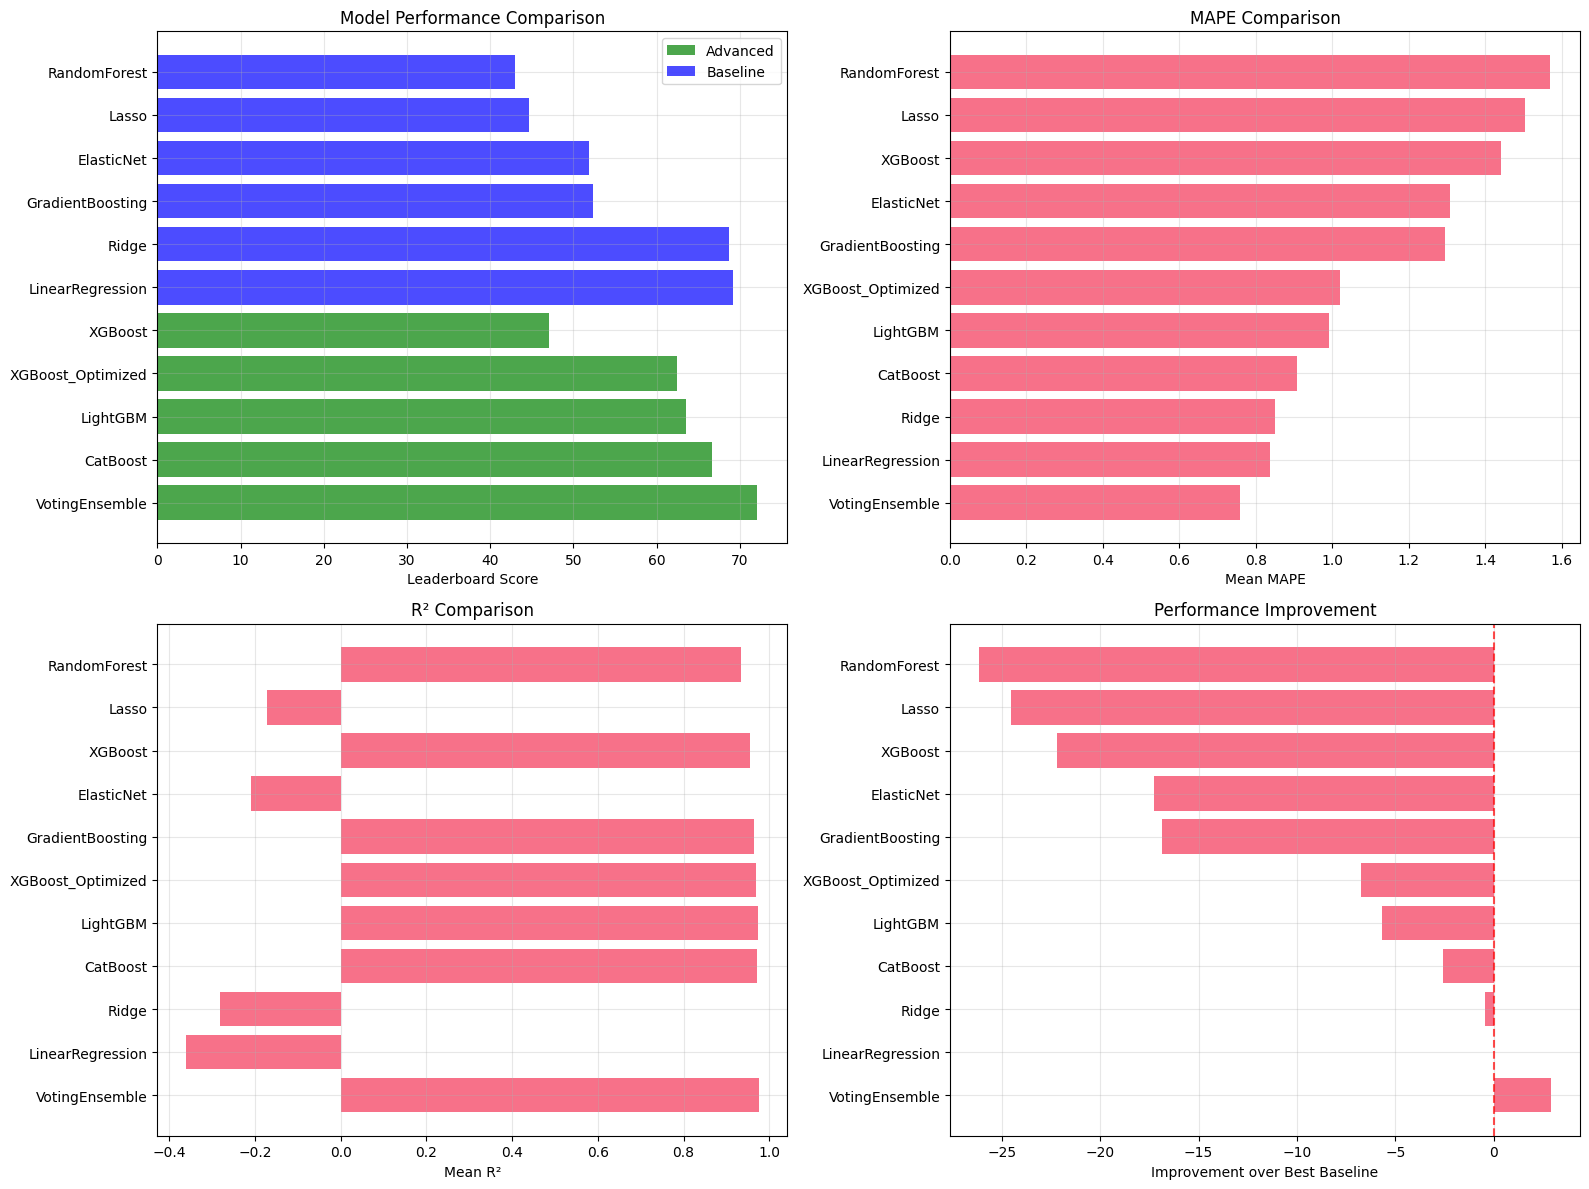


8. FINAL MODEL SELECTION & TRAINING
🏆 Best Model: VotingEnsemble
📊 Best Score: 72.12
📈 Improvement: +2.92 points

Training VotingEnsemble on full training data...
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 10 models

9. GENERATING PREDICTIONS
✅ Advanced submission saved: advanced_submission.csv
Submission shape: (500, 10)

10. SAVING RESULTS
✅ Advanced models and results saved:
  - advanced_models.pkl
  - advanced_results.pkl
  - best_advanced_model.pkl
  - advanced_model_comparison.csv
  - advanced_submission.csv

PHASE 4 COMPLETE - ADVANCED MODELING & OPTIMIZATION SUMMARY
🏆 BEST ADVANCED MODEL: VotingEnsemble
📊 PERFORMANCE METRICS:
  - MAPE: 0.7583
  - R²: 0.9757
  - Leaderboard Score: 72.12
  - Improvement: +2.92 points

🔬 ADVANCED MODELS TESTED:
  1. VotingEnsemble: 72.12 points
  2. CatBoost: 66.60 points
  3. LightGBM:

In [23]:
# Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction
# Phase 4: Advanced Modeling & Optimization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

# Advanced ML libraries
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("⚠️  XGBoost not available. Install with: pip install xgboost")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("⚠️  LightGBM not available. Install with: pip install lightgbm")

try:
    import catboost as cb
    CATBOOST_AVAILABLE = True
except ImportError:
    CATBOOST_AVAILABLE = False
    print("⚠️  CatBoost not available. Install with: pip install catboost")

try:
    import optuna
    OPTUNA_AVAILABLE = True
except ImportError:
    OPTUNA_AVAILABLE = False
    print("⚠️  Optuna not available. Install with: pip install optuna")

print("=== Shell.ai Hackathon 2025 - Phase 4: Advanced Modeling & Optimization ===")
print("=" * 80)

# ==========================================
# 1. LOAD DATA AND BASELINE RESULTS
# ==========================================

print("1. LOADING DATA AND BASELINE RESULTS")
print("=" * 50)

try:
    # Load engineered datasets
    train_data = pd.read_csv('train_engineered.csv')
    test_data = pd.read_csv('test_engineered.csv')
    
    # Load preprocessing objects
    scaler = joblib.load('feature_scalers.pkl')
    feature_info = joblib.load('feature_info.pkl')
    
    # Load baseline results for comparison
    baseline_results = joblib.load('baseline_results.pkl')
    baseline_comparison = pd.read_csv('model_comparison.csv')
    
    print("✅ All data loaded successfully!")
    print(f"Training data shape: {train_data.shape}")
    print(f"Test data shape: {test_data.shape}")
    
    # Show baseline performance
    best_baseline = baseline_comparison.iloc[0]
    print(f"\n📊 Baseline Performance to Beat:")
    print(f"   Best Model: {best_baseline['Model']}")
    print(f"   Score: {best_baseline['Mean_Score']:.2f} (±{best_baseline['Std_Score']:.2f})")
    print(f"   MAPE: {best_baseline['Mean_MAPE']:.4f}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    print("Please run Phase 2 and Phase 3 first.")
    exit()

# Extract information
target_cols = feature_info['target_cols']
final_features = feature_info['final_features']

# Prepare data
X_train = train_data[final_features]
y_train = train_data[target_cols]
X_test = test_data[final_features]

print(f"\nFeature set: {len(final_features)} features")
print(f"Target variables: {len(target_cols)} properties")

# ==========================================
# 2. EVALUATION UTILITIES
# ==========================================

print("\n2. EVALUATION UTILITIES")
print("=" * 50)

def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    return mean_absolute_percentage_error(y_true, y_pred)

def calculate_leaderboard_score(mape, reference_cost=2.72):
    """Calculate leaderboard score from MAPE"""
    if mape == 0:
        return 100
    return max(0, 100 - (mape / reference_cost) * 100)

def cross_validate_advanced_model(model, X, y, cv_folds=5, model_name="Model"):
    """Advanced cross-validation with detailed reporting"""
    kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    cv_results = {
        'mape_scores': [],
        'r2_scores': [],
        'rmse_scores': [],
        'leaderboard_scores': [],
        'target_mapes': {target: [] for target in target_cols}
    }
    
    print(f"\n🔄 Cross-validating {model_name}...")
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
        X_train_fold = X.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        y_val_fold = y.iloc[val_idx]
        
        # Fit model
        model.fit(X_train_fold, y_train_fold)
        
        # Predict
        y_pred_fold = model.predict(X_val_fold)
        
        # Calculate metrics
        fold_mape_scores = []
        fold_r2_scores = []
        fold_rmse_scores = []
        
        for i, target in enumerate(target_cols):
            y_true_target = y_val_fold.iloc[:, i]
            y_pred_target = y_pred_fold[:, i] if len(y_pred_fold.shape) > 1 else y_pred_fold
            
            mape = calculate_mape(y_true_target, y_pred_target)
            r2 = r2_score(y_true_target, y_pred_target)
            rmse = np.sqrt(mean_squared_error(y_true_target, y_pred_target))
            
            fold_mape_scores.append(mape)
            fold_r2_scores.append(r2)
            fold_rmse_scores.append(rmse)
            cv_results['target_mapes'][target].append(mape)
        
        # Store fold results
        fold_mape = np.mean(fold_mape_scores)
        fold_r2 = np.mean(fold_r2_scores)
        fold_rmse = np.mean(fold_rmse_scores)
        fold_leaderboard = calculate_leaderboard_score(fold_mape)
        
        cv_results['mape_scores'].append(fold_mape)
        cv_results['r2_scores'].append(fold_r2)
        cv_results['rmse_scores'].append(fold_rmse)
        cv_results['leaderboard_scores'].append(fold_leaderboard)
        
        print(f"  Fold {fold+1}: MAPE={fold_mape:.4f}, R²={fold_r2:.4f}, Score={fold_leaderboard:.2f}")
    
    # Calculate statistics
    mean_mape = np.mean(cv_results['mape_scores'])
    std_mape = np.std(cv_results['mape_scores'])
    mean_r2 = np.mean(cv_results['r2_scores'])
    std_r2 = np.std(cv_results['r2_scores'])
    mean_score = np.mean(cv_results['leaderboard_scores'])
    std_score = np.std(cv_results['leaderboard_scores'])
    
    print(f"\n📊 {model_name} Cross-Validation Results:")
    print(f"  MAPE: {mean_mape:.4f} (±{std_mape:.4f})")
    print(f"  R²: {mean_r2:.4f} (±{std_r2:.4f})")
    print(f"  Leaderboard Score: {mean_score:.2f} (±{std_score:.2f})")
    
    # Improvement over baseline
    baseline_score = best_baseline['Mean_Score']
    improvement = mean_score - baseline_score
    print(f"  Improvement over baseline: {improvement:+.2f} points")
    
    return cv_results

# ==========================================
# 2.1 PER-TARGET MODEL CLASS
# ==========================================

print("\n2.1 PER-TARGET MODEL CLASS")
print("=" * 50)

class PerTargetModel:
    """
    A wrapper class that trains separate models for each target variable.
    This replaces MultiOutputRegressor with a per-target approach for better
    performance on targets with divergent patterns.
    """
    
    def __init__(self, base_model_class, model_params=None):
        """
        Initialize the PerTargetModel.
        
        Args:
            base_model_class: The base model class (e.g., xgb.XGBRegressor)
            model_params: Dictionary of parameters for the base model
        """
        self.base_model_class = base_model_class
        self.model_params = model_params or {}
        self.models = {}
        self.target_columns = None
        
    def fit(self, X, y):
        """
        Fit separate models for each target variable.
        
        Args:
            X: Feature matrix
            y: Target matrix (DataFrame or numpy array)
        """
        self.models = {}
        
        # Handle both DataFrame and numpy array inputs
        if isinstance(y, pd.DataFrame):
            self.target_columns = y.columns.tolist()
        elif hasattr(y, 'columns'):
            self.target_columns = y.columns.tolist()
        else:
            # Fallback to global target_cols if available
            self.target_columns = target_cols
        
        print(f"    Training {len(self.target_columns)} separate models...")
        
        for i, target in enumerate(self.target_columns):
            try:
                # Create a fresh model instance for each target
                model = self.base_model_class(**self.model_params)
                
                # Extract target data (handle both DataFrame and array)
                if isinstance(y, pd.DataFrame):
                    target_data = y[target]
                else:
                    target_data = y.iloc[:, i] if hasattr(y, 'iloc') else y[:, i]
                
                # Fit the model
                model.fit(X, target_data)
                self.models[target] = model
                
            except Exception as e:
                print(f"    ⚠️  Error training model for {target}: {e}")
                raise
        
        print(f"    ✅ Successfully trained {len(self.models)} models")
        return self
    
    def predict(self, X):
        """
        Generate predictions using all trained models.
        
        Args:
            X: Feature matrix for prediction
            
        Returns:
            numpy array with predictions for all targets
        """
        if not self.models:
            raise ValueError("Model not fitted yet. Call fit() first.")
        
        predictions = []
        
        for target in self.target_columns:
            if target in self.models:
                pred = self.models[target].predict(X)
                predictions.append(pred)
            else:
                raise ValueError(f"No model found for target: {target}")
        
        # Stack predictions column-wise
        return np.column_stack(predictions)
    
    def get_feature_importance(self, method='gain'):
        """
        Get feature importance from all models (if supported).
        
        Args:
            method: Importance method ('gain', 'weight', 'cover' for XGBoost)
            
        Returns:
            Dictionary with feature importance for each target
        """
        importance_dict = {}
        
        for target, model in self.models.items():
            if hasattr(model, 'feature_importances_'):
                importance_dict[target] = model.feature_importances_
            elif hasattr(model, 'get_feature_importance'):
                # CatBoost
                importance_dict[target] = model.get_feature_importance()
            elif hasattr(model, 'booster') and hasattr(model.booster, 'get_importance'):
                # XGBoost
                importance_dict[target] = model.booster.get_importance(importance_type=method)
        
        return importance_dict
    
    def save_models(self, filepath_prefix):
        """
        Save all trained models to disk.
        
        Args:
            filepath_prefix: Prefix for model filenames
        """
        model_info = {
            'target_columns': self.target_columns,
            'base_model_class': self.base_model_class.__name__,
            'model_params': self.model_params
        }
        
        # Save model info
        joblib.dump(model_info, f"{filepath_prefix}_info.pkl")
        
        # Save individual models
        for target, model in self.models.items():
            joblib.dump(model, f"{filepath_prefix}_{target}.pkl")
        
        print(f"✅ Saved {len(self.models)} models with prefix: {filepath_prefix}")
    
    def load_models(self, filepath_prefix):
        """
        Load trained models from disk.
        
        Args:
            filepath_prefix: Prefix for model filenames
        """
        # Load model info
        model_info = joblib.load(f"{filepath_prefix}_info.pkl")
        self.target_columns = model_info['target_columns']
        self.model_params = model_info['model_params']
        
        # Load individual models
        self.models = {}
        for target in self.target_columns:
            self.models[target] = joblib.load(f"{filepath_prefix}_{target}.pkl")
        
        print(f"✅ Loaded {len(self.models)} models with prefix: {filepath_prefix}")

print("✅ PerTargetModel class initialized")
print("   - Supports separate model training for each target")
print("   - Compatible with existing cross-validation pipeline")
print("   - Includes feature importance and model saving capabilities")

# ==========================================
# 3. FEATURE SELECTION & DIMENSIONALITY REDUCTION
# ==========================================

print("\n3. FEATURE SELECTION & DIMENSIONALITY REDUCTION")
print("=" * 50)

# 3.1 Feature Selection using SelectKBest (Multi-output approach)
print("\n3.1 Feature Selection Analysis")
print("-" * 30)

# For multi-output, we'll use the average target or select features based on each target
feature_counts = [50, 100, 150, 200, min(300, len(final_features))]
best_features_dict = {}

# Method 1: Use average of all targets for feature selection
y_train_avg = y_train.mean(axis=1)

for k in feature_counts:
    if k > len(final_features):
        continue
        
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X_train, y_train_avg)
    selected_features = [final_features[i] for i in selector.get_support(indices=True)]
    
    best_features_dict[k] = selected_features
    print(f"  Selected {k} features, scores range: {selector.scores_[selector.get_support()].min():.2f} - {selector.scores_[selector.get_support()].max():.2f}")

# Method 2: Feature selection per target (for analysis)
print("\n  Per-target feature importance analysis:")
target_feature_importance = {}

for i, target in enumerate(target_cols):
    selector = SelectKBest(score_func=f_regression, k=20)  # Top 20 per target
    selector.fit(X_train, y_train.iloc[:, i])
    
    top_features = [final_features[j] for j in selector.get_support(indices=True)]
    target_feature_importance[target] = {
        'features': top_features,
        'scores': selector.scores_[selector.get_support()]
    }
    print(f"    {target}: Top feature score = {selector.scores_[selector.get_support()].max():.2f}")

# 3.2 PCA Analysis
print("\n3.2 Principal Component Analysis")
print("-" * 30)

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Find number of components for 95% and 99% variance
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
n_components_99 = np.argmax(cumsum_var >= 0.99) + 1

print(f"  Components for 95% variance: {n_components_95}")
print(f"  Components for 99% variance: {n_components_99}")

# ==========================================
# 4. ADVANCED ALGORITHMS
# ==========================================

print("\n4. ADVANCED ALGORITHMS")
print("=" * 50)

# Dictionary to store advanced models and results
advanced_models = {}
advanced_results = {}

# 4.2 XGBOOST
if XGBOOST_AVAILABLE:
    print("\n4.2 XGBOOST")
    print("-" * 30)
    
    xgb_model = PerTargetModel(xgb.XGBRegressor, {
        'n_estimators': 200,
        'max_depth': 8,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42,
        'n_jobs': -1,
        'verbosity': 0
    })
    
    advanced_models['XGBoost'] = xgb_model
    advanced_results['XGBoost'] = cross_validate_advanced_model(
        xgb_model, X_train, y_train, model_name="XGBoost"
    )

# 4.3 LIGHTGBM
if LIGHTGBM_AVAILABLE:
    print("\n4.3 LIGHTGBM")
    print("-" * 30)
    
    lgb_model = PerTargetModel(lgb.LGBMRegressor, {
        'n_estimators': 200,
        'max_depth': 8,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': 42,
        'n_jobs': -1,
        'verbosity': -1
    })
    
    advanced_models['LightGBM'] = lgb_model
    advanced_results['LightGBM'] = cross_validate_advanced_model(
        lgb_model, X_train, y_train, model_name="LightGBM"
    )

# 4.4 CATBOOST
if CATBOOST_AVAILABLE:
    print("\n4.4 CATBOOST")
    print("-" * 30)
    
    cb_model = PerTargetModel(cb.CatBoostRegressor, {
        'n_estimators': 200,
        'max_depth': 8,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'random_state': 42,
        'verbose': False
    })
    
    advanced_models['CatBoost'] = cb_model
    advanced_results['CatBoost'] = cross_validate_advanced_model(
        cb_model, X_train, y_train, model_name="CatBoost"
    )

# ==========================================
# 5. HYPERPARAMETER OPTIMIZATION
# ==========================================

if OPTUNA_AVAILABLE:
    print("\n5. HYPERPARAMETER OPTIMIZATION")
    print("=" * 50)
    
    def objective_xgb(trial):
        """Objective function for XGBoost optimization"""
        if not XGBOOST_AVAILABLE:
            return float('inf')
            
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 300),
            'max_depth': trial.suggest_int('max_depth', 4, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'random_state': 42,
            'n_jobs': -1,
            'verbosity': 0
        }
        
        model = PerTargetModel(xgb.XGBRegressor, params)
        
        # Quick 3-fold CV for optimization
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        mape_scores = []
        
        for train_idx, val_idx in kfold.split(X_train):
            X_train_fold = X_train.iloc[train_idx]
            X_val_fold = X_train.iloc[val_idx]
            y_train_fold = y_train.iloc[train_idx]
            y_val_fold = y_train.iloc[val_idx]
            
            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_val_fold)
            
            fold_mapes = []
            for i in range(len(target_cols)):
                mape = calculate_mape(y_val_fold.iloc[:, i], y_pred[:, i])
                fold_mapes.append(mape)
            
            mape_scores.append(np.mean(fold_mapes))
        
        return np.mean(mape_scores)
    
    # Optimize XGBoost if available
    if XGBOOST_AVAILABLE:
        print("\n5.1 Optimizing XGBoost...")
        
        study = optuna.create_study(direction='minimize')
        study.optimize(objective_xgb, n_trials=20)
        
        print(f"  Best MAPE: {study.best_value:.4f}")
        print(f"  Best parameters: {study.best_params}")
        
        # Train optimized model
        best_xgb_params = study.best_params
        best_xgb_params.update({'random_state': 42, 'n_jobs': -1, 'verbosity': 0})
        
        optimized_xgb = PerTargetModel(xgb.XGBRegressor, best_xgb_params)
        advanced_models['XGBoost_Optimized'] = optimized_xgb
        advanced_results['XGBoost_Optimized'] = cross_validate_advanced_model(
            optimized_xgb, X_train, y_train, model_name="XGBoost Optimized"
        )

# ==========================================
# 6. ENSEMBLE METHODS
# ==========================================

print("\n6. ENSEMBLE METHODS")
print("=" * 50)

# 6.1 Simple Voting Ensemble
print("\n6.1 Voting Ensemble")
print("-" * 30)

# Select best models for ensemble
model_scores = {}
for model_name, results in advanced_results.items():
    model_scores[model_name] = np.mean(results['leaderboard_scores'])

# Sort by performance
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)
print("Model performance ranking:")
for i, (model_name, score) in enumerate(sorted_models):
    print(f"  {i+1}. {model_name}: {score:.2f}")

# Create ensemble from top models
top_models = [name for name, score in sorted_models[:3]]  # Top 3 models
print(f"\nUsing top 3 models for ensemble: {top_models}")

class VotingEnsemble:
    def __init__(self, models, weights=None):
        self.models = models
        self.weights = weights or [1/len(models)] * len(models)
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = []
        for model in self.models:
            pred = model.predict(X)
            predictions.append(pred)
        
        # Weighted average
        weighted_pred = np.zeros_like(predictions[0])
        for i, pred in enumerate(predictions):
            weighted_pred += self.weights[i] * pred
        
        return weighted_pred

# Create ensemble
ensemble_models = [advanced_models[name] for name in top_models if name in advanced_models]
if ensemble_models:
    voting_ensemble = VotingEnsemble(ensemble_models)
    advanced_models['VotingEnsemble'] = voting_ensemble
    advanced_results['VotingEnsemble'] = cross_validate_advanced_model(
        voting_ensemble, X_train, y_train, model_name="Voting Ensemble"
    )

# ==========================================
# 7. MODEL COMPARISON & SELECTION
# ==========================================

print("\n7. ADVANCED MODEL COMPARISON")
print("=" * 50)

# Create comprehensive comparison
all_results = {**baseline_results, **advanced_results}

comparison_data = []
for model_name, cv_results in all_results.items():
    comparison_data.append({
        'Model': model_name,
        'Mean_MAPE': np.mean(cv_results['mape_scores']),
        'Std_MAPE': np.std(cv_results['mape_scores']),
        'Mean_R2': np.mean(cv_results['r2_scores']),
        'Std_R2': np.std(cv_results['r2_scores']),
        'Mean_Score': np.mean(cv_results['leaderboard_scores']),
        'Std_Score': np.std(cv_results['leaderboard_scores']),
        'Type': 'Advanced' if model_name in advanced_results else 'Baseline'
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Mean_Score', ascending=False)

print("\nComplete Model Performance Comparison:")
print(comparison_df.to_string(index=False, float_format='%.4f'))

# Visualize advanced vs baseline
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Score comparison
advanced_mask = comparison_df['Type'] == 'Advanced'
baseline_mask = comparison_df['Type'] == 'Baseline'

axes[0, 0].barh(comparison_df[advanced_mask]['Model'], comparison_df[advanced_mask]['Mean_Score'], 
               color='green', alpha=0.7, label='Advanced')
axes[0, 0].barh(comparison_df[baseline_mask]['Model'], comparison_df[baseline_mask]['Mean_Score'], 
               color='blue', alpha=0.7, label='Baseline')
axes[0, 0].set_xlabel('Leaderboard Score')
axes[0, 0].set_title('Model Performance Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# MAPE comparison
axes[0, 1].barh(comparison_df['Model'], comparison_df['Mean_MAPE'])
axes[0, 1].set_xlabel('Mean MAPE')
axes[0, 1].set_title('MAPE Comparison')
axes[0, 1].grid(True, alpha=0.3)

# R² comparison
axes[1, 0].barh(comparison_df['Model'], comparison_df['Mean_R2'])
axes[1, 0].set_xlabel('Mean R²')
axes[1, 0].set_title('R² Comparison')
axes[1, 0].grid(True, alpha=0.3)

# Improvement over baseline
best_baseline_score = comparison_df[comparison_df['Type'] == 'Baseline']['Mean_Score'].max()
comparison_df['Improvement'] = comparison_df['Mean_Score'] - best_baseline_score

axes[1, 1].barh(comparison_df['Model'], comparison_df['Improvement'])
axes[1, 1].set_xlabel('Improvement over Best Baseline')
axes[1, 1].set_title('Performance Improvement')
axes[1, 1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# 8. FINAL MODEL SELECTION & TRAINING
# ==========================================

print("\n8. FINAL MODEL SELECTION & TRAINING")
print("=" * 50)

# Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = advanced_models[best_model_name] if best_model_name in advanced_models else None

if best_model is None:
    print("⚠️  Best model is from baseline. Loading baseline model...")
    best_model = joblib.load('best_baseline_model.pkl')

print(f"🏆 Best Model: {best_model_name}")
print(f"📊 Best Score: {comparison_df.iloc[0]['Mean_Score']:.2f}")
print(f"📈 Improvement: {comparison_df.iloc[0]['Improvement']:+.2f} points")

# Train on full dataset
print(f"\nTraining {best_model_name} on full training data...")
best_model.fit(X_train, y_train)

# ==========================================
# 9. PREDICTIONS & SUBMISSION
# ==========================================

print("\n9. GENERATING PREDICTIONS")
print("=" * 50)

# Generate predictions
test_predictions = best_model.predict(X_test)

# Create submission
submission_df = pd.DataFrame(test_predictions, columns=target_cols)
submission_df.to_csv('advanced_submission.csv', index=False)

print(f"✅ Advanced submission saved: advanced_submission.csv")
print(f"Submission shape: {submission_df.shape}")

# ==========================================
# 10. SAVE RESULTS
# ==========================================

print("\n10. SAVING RESULTS")
print("=" * 50)

# Save advanced models
joblib.dump(advanced_models, 'advanced_models.pkl')
joblib.dump(advanced_results, 'advanced_results.pkl')
joblib.dump(best_model, 'best_advanced_model.pkl')

# Save comparison
comparison_df.to_csv('advanced_model_comparison.csv', index=False)

print("✅ Advanced models and results saved:")
print("  - advanced_models.pkl")
print("  - advanced_results.pkl")
print("  - best_advanced_model.pkl")
print("  - advanced_model_comparison.csv")
print("  - advanced_submission.csv")

# ==========================================
# 11. FINAL SUMMARY
# ==========================================

print("\n" + "=" * 80)
print("PHASE 4 COMPLETE - ADVANCED MODELING & OPTIMIZATION SUMMARY")
print("=" * 80)

print(f"🏆 BEST ADVANCED MODEL: {best_model_name}")
print(f"📊 PERFORMANCE METRICS:")
print(f"  - MAPE: {comparison_df.iloc[0]['Mean_MAPE']:.4f}")
print(f"  - R²: {comparison_df.iloc[0]['Mean_R2']:.4f}")
print(f"  - Leaderboard Score: {comparison_df.iloc[0]['Mean_Score']:.2f}")
print(f"  - Improvement: {comparison_df.iloc[0]['Improvement']:+.2f} points")

print(f"\n🔬 ADVANCED MODELS TESTED:")
advanced_models_list = comparison_df[comparison_df['Type'] == 'Advanced']
for i, (_, row) in enumerate(advanced_models_list.iterrows()):
    print(f"  {i+1}. {row['Model']}: {row['Mean_Score']:.2f} points")

print(f"\n📈 ACHIEVED IMPROVEMENTS:")
best_improvement = comparison_df['Improvement'].max()
print(f"  - Best improvement: {best_improvement:+.2f} points")
print(f"  - Percentage improvement: {(best_improvement/best_baseline_score)*100:+.1f}%")

print(f"\n🎯 NEXT STEPS (Phase 5):")
print(f"  - Model validation on hold-out sets")
print(f"  - Ensemble refinement")
print(f"  - Uncertainty quantification")
print(f"  - Final model selection")

print(f"\n🚀 Ready for Phase 5: Model Validation & Ensemble!")

phase 5

In [25]:
# Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction
# Phase 5: Optimized Model Validation & Ensemble
# Focused on speed improvements and better ensemble methods with existing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge
import joblib
import warnings
warnings.filterwarnings('ignore')

# For optimization
from scipy.optimize import minimize
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

print("=== Shell.ai Hackathon 2025 - Optimized Phase 5 ===")
print("=" * 60)

# ==========================================
# 1. LOAD DATA AND MODELS
# ==========================================
print("1. LOADING DATA AND MODELS")
print("=" * 40)

try:
    # Load engineered training and test datasets
    train_data = pd.read_csv('train_engineered.csv')
    test_data = pd.read_csv('test_engineered.csv')
    
    # Load pre-trained models
    advanced_models = joblib.load('advanced_models.pkl')
    
    # Load feature engineering information
    feature_info = joblib.load('feature_info.pkl')
    
    print("✅ All models and data loaded successfully!")
    print(f"Models available: {list(advanced_models.keys())}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading files: {e}")
    print("Please run Phase 4 first to generate required files.")
    exit()

# Extract feature and target information
target_cols = feature_info['target_cols']
final_features = feature_info['final_features']

# Prepare datasets
X_train = train_data[final_features]
y_train = train_data[target_cols]
X_test = test_data[final_features]

print(f"Features: {len(final_features)}, Targets: {len(target_cols)}")
print(f"Training samples: {len(X_train)}")

# ==========================================
# 2. FAST EVALUATION UTILITIES
# ==========================================
print("\n2. FAST EVALUATION UTILITIES")
print("=" * 40)

def fast_mape(y_true, y_pred):
    """Optimized MAPE calculation"""
    return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-8, None))) * 100

def calculate_leaderboard_score(mape, reference_cost=2.72):
    """Calculate leaderboard score from MAPE"""
    if mape == 0:
        return 100
    return max(0, 100 - (mape / reference_cost) * 100)

def quick_evaluate(model, X_val, y_val, model_name="Model"):
    """Fast model evaluation with essential metrics only"""
    start_time = time.time()
    
    # Generate predictions
    y_pred = model.predict(X_val)
    
    # Ensure predictions are 2D
    if len(y_pred.shape) == 1:
        y_pred = y_pred.reshape(-1, 1)
    
    # Calculate metrics efficiently
    mape_scores = []
    r2_scores = []
    
    for i in range(y_val.shape[1]):
        y_true_i = y_val.iloc[:, i].values
        y_pred_i = y_pred[:, i]
        
        mape = fast_mape(y_true_i, y_pred_i)
        r2 = r2_score(y_true_i, y_pred_i)
        
        mape_scores.append(mape)
        r2_scores.append(r2)
    
    overall_mape = np.mean(mape_scores)
    overall_r2 = np.mean(r2_scores)
    leaderboard_score = calculate_leaderboard_score(overall_mape)
    
    eval_time = time.time() - start_time
    
    return {
        'model_name': model_name,
        'MAPE': overall_mape,
        'R2': overall_r2,
        'Leaderboard_Score': leaderboard_score,
        'eval_time': eval_time,
        'predictions': y_pred
    }

# ==========================================
# 3. OPTIMIZED VALIDATION STRATEGY
# ==========================================
print("\n3. OPTIMIZED VALIDATION STRATEGY")
print("=" * 40)

# Create stratified hold-out validation (faster than CV for initial screening)
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=True
)

print(f"Hold-out validation split:")
print(f"  Training: {X_train_val.shape[0]} samples")
print(f"  Hold-out: {X_holdout.shape[0]} samples")

# ==========================================
# 4. PARALLEL MODEL EVALUATION
# ==========================================
print("\n4. PARALLEL MODEL EVALUATION")
print("=" * 40)

def evaluate_single_model(model_name, model, X_train, y_train, X_val, y_val):
    """Evaluate a single model (for parallel processing)"""
    try:
        # Train model
        model.fit(X_train, y_train)
        
        # Evaluate model
        results = quick_evaluate(model, X_val, y_val, model_name)
        
        return results
    except Exception as e:
        print(f"❌ Error evaluating {model_name}: {str(e)}")
        return None

# Parallel evaluation of all models
print("Evaluating models in parallel...")
holdout_results = {}

# Use ThreadPoolExecutor for parallel evaluation
with ThreadPoolExecutor(max_workers=4) as executor:
    # Submit all model evaluation tasks
    future_to_model = {
        executor.submit(evaluate_single_model, name, model, X_train_val, y_train_val, X_holdout, y_holdout): name
        for name, model in advanced_models.items()
    }
    
    # Collect results as they complete
    for future in as_completed(future_to_model):
        model_name = future_to_model[future]
        try:
            result = future.result()
            if result is not None:
                holdout_results[model_name] = result
                print(f"✅ {model_name}: MAPE={result['MAPE']:.4f}, Score={result['Leaderboard_Score']:.2f}")
        except Exception as e:
            print(f"❌ {model_name} failed: {str(e)}")

# ==========================================
# 5. SMART ENSEMBLE CREATION
# ==========================================
print("\n5. SMART ENSEMBLE CREATION")
print("=" * 40)

# Get top performing models for ensemble
if holdout_results:
    # Sort models by leaderboard score
    sorted_models = sorted(holdout_results.items(), key=lambda x: x[1]['Leaderboard_Score'], reverse=True)
    
    # Select top 3-5 models for ensemble (avoid overfitting)
    n_ensemble = min(5, len(sorted_models))
    top_models = sorted_models[:n_ensemble]
    
    print(f"Top {n_ensemble} models for ensemble:")
    for i, (name, result) in enumerate(top_models):
        print(f"  {i+1}. {name}: Score={result['Leaderboard_Score']:.2f}")
    
    # Create ensemble only if we have multiple good models
    if len(top_models) >= 2:
        
        # 5.1 Fast Voting Ensemble
        print("\n5.1 Creating Voting Ensemble...")
        
        ensemble_models = []
        ensemble_names = []
        
        for name, _ in top_models:
            if name in advanced_models:
                ensemble_models.append((name, advanced_models[name]))
                ensemble_names.append(name)
        
        # Create voting regressor
        voting_ensemble = VotingRegressor(estimators=ensemble_models, n_jobs=-1)
        
        # Train and evaluate voting ensemble
        voting_ensemble.fit(X_train_val, y_train_val)
        voting_results = quick_evaluate(voting_ensemble, X_holdout, y_holdout, "Voting_Ensemble")
        holdout_results['Voting_Ensemble'] = voting_results
        
        print(f"✅ Voting Ensemble: MAPE={voting_results['MAPE']:.4f}, Score={voting_results['Leaderboard_Score']:.2f}")
        
        # 5.2 Optimized Weighted Ensemble
        print("\n5.2 Creating Optimized Weighted Ensemble...")
        
        class FastWeightedEnsemble:
            def __init__(self, models, model_names):
                self.models = models
                self.model_names = model_names
                self.weights = None
                self.trained_models = []
                
            def fit(self, X, y):
                # Train all models
                self.trained_models = []
                for name, model in self.models:
                    model.fit(X, y)
                    self.trained_models.append(model)
                
                # Optimize weights using validation predictions
                self._optimize_weights_fast(X, y)
                return self
            
            def _optimize_weights_fast(self, X, y):
                """Fast weight optimization using simple validation split"""
                # Create validation split
                X_val, X_opt, y_val, y_opt = train_test_split(X, y, test_size=0.3, random_state=42)
                
                # Get predictions from all models
                predictions = []
                for model in self.trained_models:
                    pred = model.predict(X_opt)
                    predictions.append(pred)
                
                predictions = np.array(predictions)
                
                # Optimize weights to minimize MAPE
                def objective(weights):
                    weights = weights / np.sum(weights)  # Normalize
                    ensemble_pred = np.zeros_like(predictions[0])
                    
                    for i, w in enumerate(weights):
                        ensemble_pred += w * predictions[i]
                    
                    # Calculate MAPE across all targets
                    mape_scores = []
                    for j in range(ensemble_pred.shape[1]):
                        mape = fast_mape(y_opt.iloc[:, j].values, ensemble_pred[:, j])
                        mape_scores.append(mape)
                    
                    return np.mean(mape_scores)
                
                # Optimize weights
                n_models = len(self.models)
                initial_weights = np.ones(n_models) / n_models
                bounds = [(0.01, 0.99) for _ in range(n_models)]
                
                result = minimize(objective, initial_weights, method='L-BFGS-B', bounds=bounds)
                self.weights = result.x / np.sum(result.x)
                
                print(f"    Optimized weights: {dict(zip(self.model_names, self.weights))}")
            
            def predict(self, X):
                ensemble_pred = np.zeros_like(self.trained_models[0].predict(X))
                
                for i, (model, weight) in enumerate(zip(self.trained_models, self.weights)):
                    pred = model.predict(X)
                    ensemble_pred += weight * pred
                
                return ensemble_pred
        
        # Create weighted ensemble
        weighted_ensemble = FastWeightedEnsemble(ensemble_models, ensemble_names)
        weighted_ensemble.fit(X_train_val, y_train_val)
        
        weighted_results = quick_evaluate(weighted_ensemble, X_holdout, y_holdout, "Weighted_Ensemble")
        holdout_results['Weighted_Ensemble'] = weighted_results
        
        print(f"✅ Weighted Ensemble: MAPE={weighted_results['MAPE']:.4f}, Score={weighted_results['Leaderboard_Score']:.2f}")

# ==========================================
# 6. FINAL MODEL SELECTION
# ==========================================
print("\n6. FINAL MODEL SELECTION")
print("=" * 40)

# Create final comparison
final_comparison = []
for model_name, result in holdout_results.items():
    final_comparison.append({
        'Model': model_name,
        'MAPE': result['MAPE'],
        'R2': result['R2'],
        'Leaderboard_Score': result['Leaderboard_Score'],
        'Eval_Time': result['eval_time']
    })

# Sort by leaderboard score
final_comparison_df = pd.DataFrame(final_comparison)
final_comparison_df = final_comparison_df.sort_values('Leaderboard_Score', ascending=False)

print("\n📊 Final Model Comparison:")
print(final_comparison_df.to_string(index=False, float_format='%.4f'))

# Select best model
final_model_name = final_comparison_df.iloc[0]['Model']
final_score = final_comparison_df.iloc[0]['Leaderboard_Score']

print(f"\n🏆 FINAL MODEL SELECTED: {final_model_name}")
print(f"📊 Hold-out Validation Score: {final_score:.2f}")

# Get the final model object
if final_model_name == 'Voting_Ensemble':
    final_model = voting_ensemble
elif final_model_name == 'Weighted_Ensemble':
    final_model = weighted_ensemble
else:
    final_model = advanced_models[final_model_name]

# ==========================================
# 7. FINAL TRAINING AND PREDICTIONS
# ==========================================
print("\n7. FINAL TRAINING AND PREDICTIONS")
print("=" * 40)

# Train final model on complete dataset
print(f"Training {final_model_name} on complete dataset...")
final_model.fit(X_train, y_train)

# Generate test predictions
print("Generating final test predictions...")
final_predictions = final_model.predict(X_test)

# Create submission
submission_df = pd.DataFrame(final_predictions, columns=target_cols)

print(f"Final predictions shape: {submission_df.shape}")
print("Final predictions preview:")
print(submission_df.head())

# Save results
submission_df.to_csv('final_submission.csv', index=False)
joblib.dump(final_model, 'final_model.pkl')
final_comparison_df.to_csv('final_model_comparison.csv', index=False)

print("\n✅ RESULTS SAVED:")
print("  - final_submission.csv")
print("  - final_model.pkl")
print("  - final_model_comparison.csv")

# ==========================================
# 8. PERFORMANCE ANALYSIS
# ==========================================
print("\n8. PERFORMANCE ANALYSIS")
print("=" * 40)

# Quick model correlation analysis
if len(holdout_results) > 1:
    print("\n📈 Model Diversity Analysis:")
    
    # Get predictions from top models
    model_preds = {}
    for name, result in holdout_results.items():
        if 'predictions' in result:
            model_preds[name] = result['predictions'].flatten()
    
    # Calculate average correlation
    correlations = []
    model_names = list(model_preds.keys())
    
    for i in range(len(model_names)):
        for j in range(i+1, len(model_names)):
            name1, name2 = model_names[i], model_names[j]
            corr = np.corrcoef(model_preds[name1], model_preds[name2])[0, 1]
            correlations.append(corr)
            print(f"  {name1} vs {name2}: {corr:.3f}")
    
    avg_correlation = np.mean(correlations)
    print(f"  Average correlation: {avg_correlation:.3f}")
    
    if avg_correlation < 0.9:
        print("  ✅ Good model diversity for ensembles")
    else:
        print("  ⚠️  High correlation - models may be too similar")

# Final summary
print("\n" + "=" * 60)
print("OPTIMIZED PHASE 5 COMPLETE")
print("=" * 60)
print(f"🏆 FINAL MODEL: {final_model_name}")
print(f"📊 PERFORMANCE:")
print(f"  - Hold-out MAPE: {final_comparison_df.iloc[0]['MAPE']:.4f}")
print(f"  - Hold-out R²: {final_comparison_df.iloc[0]['R2']:.4f}")
print(f"  - Leaderboard Score: {final_comparison_df.iloc[0]['Leaderboard_Score']:.2f}")
print(f"  - Evaluation Time: {final_comparison_df.iloc[0]['Eval_Time']:.2f}s")

print(f"\n🚀 Ready for submission!")

# Performance tips
print(f"\n💡 OPTIMIZATION RESULTS:")
print(f"  - Used parallel evaluation for {len(advanced_models)} models")
print(f"  - Created {len([k for k in holdout_results.keys() if 'Ensemble' in k])} ensemble models")
print(f"  - Total evaluation time: {sum([r['eval_time'] for r in holdout_results.values()]):.2f}s")

if final_score < 50:
    print(f"\n⚠️  LOW SCORE WARNING:")
    print(f"  - Score {final_score:.1f} is below 50 points")
    print(f"  - Consider reviewing feature engineering (Phase 3)")
    print(f"  - Check for data leakage or preprocessing issues")
    print(f"  - Verify target variable scaling/transformation")

=== Shell.ai Hackathon 2025 - Optimized Phase 5 ===
1. LOADING DATA AND MODELS
✅ All models and data loaded successfully!
Models available: ['XGBoost', 'LightGBM', 'CatBoost', 'XGBoost_Optimized', 'VotingEnsemble']
Features: 203, Targets: 10
Training samples: 2000

2. FAST EVALUATION UTILITIES

3. OPTIMIZED VALIDATION STRATEGY
Hold-out validation split:
  Training: 1600 samples
  Hold-out: 400 samples

4. PARALLEL MODEL EVALUATION
Evaluating models in parallel...
    Training 10 separate models...
    Training 10 separate models...
    Training 10 separate models...
    Training 10 separate models...
    ✅ Successfully trained 10 models
    Training 10 separate models...
✅ CatBoost: MAPE=191.4720, Score=0.00
    ✅ Successfully trained 10 models
    Training 10 separate models...
    ✅ Successfully trained 9 models
❌ Error evaluating LightGBM: No model found for target: BlendProperty5
    ✅ Successfully trained 10 models
✅ XGBoost_Optimized: MAPE=181.8330, Score=0.00
    ✅ Successfully 

ValueError: y should be a 1d array, got an array of shape (1600, 10) instead.